In [1]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
미국면적 = pd.read_csv('미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('미국 인구.csv',encoding='CP949')
미국집값상승률 = pd.read_csv('미국 집값 상승률.csv',encoding='CP949')
미국집값 = pd.read_csv('미국 집값.csv',encoding='CP949')
미국이주율 = pd.read_csv('미국이주율.csv',encoding='CP949')

미국집값=미국집값.set_index('state')
미국이주율=미국이주율.set_index('state')
미국집값상승률=미국집값상승률.set_index('state')
미국인구=미국인구.set_index('state')
미국면적=미국면적.set_index('state')

미국집값상승률1=미국집값상승률[미국집값상승률['period']=='2020-Q4']
미국집값상승률2=미국집값상승률[미국집값상승률['period']=='2010-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])


미국데이터= pd.concat([(미국인구['population']),(미국면적['km2'])],axis=1)
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']
미국데이터['이주율']=미국이주율['1000명당 이주율']
미국데이터['집값상승률']=(미국집값상승률)
미국데이터['미국집값']=미국집값['single-family']
미국데이터['미국집값']=미국데이터['미국집값']*1115.13/100000
미국데이터=미국데이터.drop(['D.C'])


In [3]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)


C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


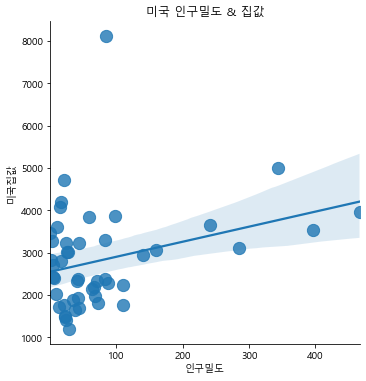

In [4]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['미국집값'])],axis=1)
data.drop(data.index[8],inplace=True)
data.drop(data.index[10],inplace=True)
g=sns.lmplot('인구밀도','미국집값',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title("미국 인구밀도 & 집값")
plt.show(g)

In [5]:
from scipy import stats
from statsmodels.formula.api import ols, glm 
import statsmodels.api as sm
data=mean_norm(data)
m1 = ols ( '인구밀도~미국집값', data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.732
Date:                Tue, 01 Jun 2021   Prob (F-statistic):             0.0348
Time:                        21:16:27   Log-Likelihood:                -65.254
No. Observations:                  48   AIC:                             134.5
Df Residuals:                      46   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.714e-17      0.139  -6.99e-16      1.000      -0.280       0.280
미국집값           0.3054      0.140      2.175      0.035       0.023       0.588
==============================================================================
Omnibus:                       30.768   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.889
Skew:                           1.928   Prob(JB):                     6.00e-14
Kurtosis:                       6.947   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
data[['인구밀도','미국집값']].corr()

,인구밀도,미국집값
인구밀도,1.000000,0.305405
미국집값,0.305405,1.000000


Text(0.5, 1.0, '미국 집값')

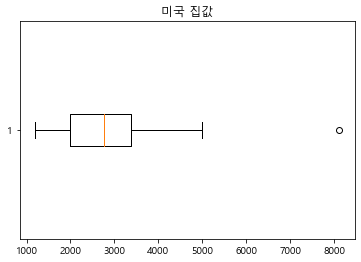

In [7]:
plt.boxplot(미국데이터['미국집값'], vert=False)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구밀도')

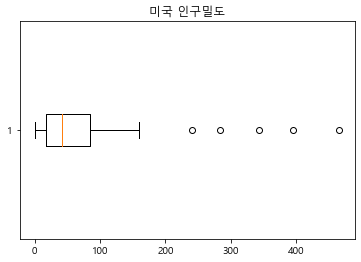

In [8]:
plt.boxplot(미국데이터['인구밀도'], vert=False)
plt.title("미국 인구밀도")

Text(0.5, 1.0, '미국 집값')

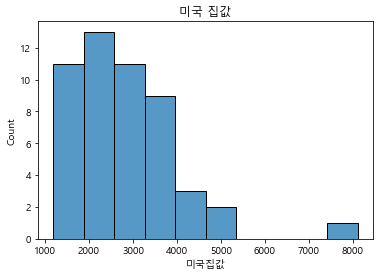

In [9]:
sns.histplot(x='미국집값', data=미국데이터)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 집값')

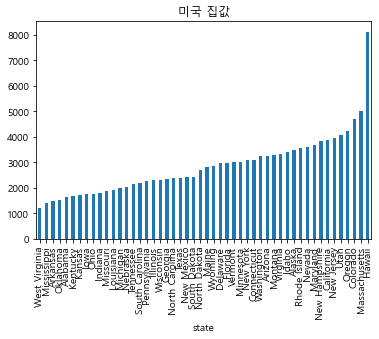

In [10]:
(미국데이터['미국집값']).sort_values().plot(kind='bar')
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구')

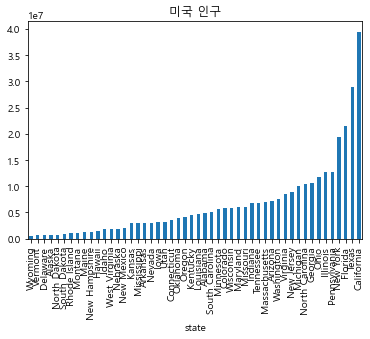

In [11]:
(미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구")

Text(0.5, 1.0, '미국 인구 x 집값')

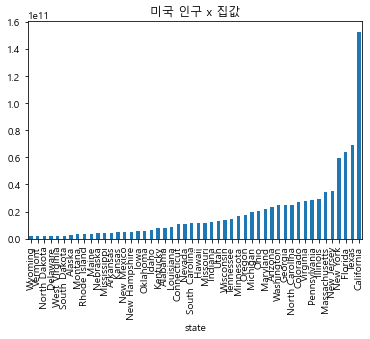

In [12]:
(미국데이터['미국집값']*미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구 x 집값")

In [13]:
np.std((미국데이터['미국집값']*미국데이터['population']))

24629468421.647083

In [14]:
(미국데이터['미국집값']*미국데이터['population']).sum()/(미국데이터['population'].sum())

2835.3142699897176

In [15]:
국내집값 = pd.read_csv('국내집값.csv',encoding='CP949')
국내집값=국내집값[국내집값['지역별(2)'].isin(['서울','인천','경기','부산','대구','광주','대전','울산','세종','강원','충북','충남','전북','전남','경북','경남','제주'])]
국내집값=국내집값.set_index('지역별(2)')
국내집값=국내집값.loc[:,['2015. 10','2015. 11','2015. 12',
         '2016. 01','2016. 02','2016. 03','2016. 04','2016. 05','2016. 06','2016. 07','2016. 08','2016. 09','2016. 10','2016. 11','2016. 12',
         '2017. 01','2017. 02','2017. 03','2017. 04','2017. 05','2017. 06','2017. 07','2017. 08','2017. 09','2017. 10','2017. 11','2017. 12',
         '2018. 01','2018. 02','2018. 03','2018. 04','2018. 05','2018. 06','2018. 07','2018. 08','2018. 09','2018. 10','2018. 11','2018. 12',
         '2019. 01','2019. 02','2019. 03','2019. 04','2019. 05','2019. 06','2019. 07','2019. 08','2019. 09','2019. 10','2019. 11','2019. 12',
         '2020. 01','2020. 02','2020. 03','2020. 04','2020. 05','2020. 06','2020. 07','2020. 08','2020. 09','2020. 10','2020. 11','2020. 12',
         '2021. 01','2021. 02']]
국내집값=국내집값.fillna(3000)

국내집값=국내집값.astype(int)
국내집값=국내집값
국내인구밀도 = pd.read_csv('국내인구밀도.csv',encoding='CP949')
국내인구밀도=국내인구밀도.set_index('지역')
국내인구밀도=국내인구밀도.astype(int)
국내인구밀도['2020인구밀도']=국내인구밀도['2020인구밀도']*1000
국내인구밀도=국내인구밀도.drop(['수도권'])

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


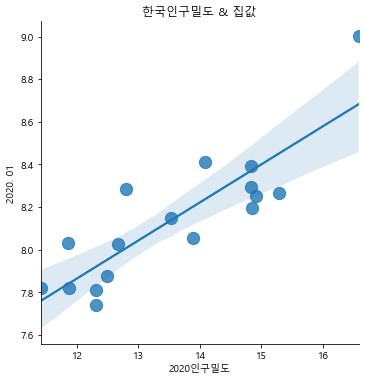

In [16]:
data = pd.concat([np.log(국내인구밀도['2020인구밀도']),np.log(국내집값['2020. 01'])],axis=1)
g=sns.lmplot('2020인구밀도','2020. 01',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

In [17]:
data=data.rename({'2020인구밀도':'인구밀도','2020. 01':'집값'},axis='columns')
data=mean_norm(data)

In [18]:
m1 = ols ( '인구밀도~집값', data=data).fit()
m1.summary()

C:\Users\KimSungYong\anaconda3\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     41.00
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.19e-05
Time:                        21:16:29   Log-Likelihood:                -12.410
No. Observations:                  17   AIC:                             28.82
Df Residuals:                      15   BIC:                             30.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.262e-15      0.130   1.74e-14      1.000      -0.276       0.276
집값             0.8557      0.134      6.403      0.000       0.571       1.140
==============================================================================
Omnibus:                        0.721   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.654
Skew:                          -0.120   Prob(JB):                        0.721
Kurtosis:                       2.070   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
data[['인구밀도','집값']].corr()

,인구밀도,집값
인구밀도,1.000000,0.855653
집값,0.855653,1.000000


Text(0.5, 1.0, '한국 집값')

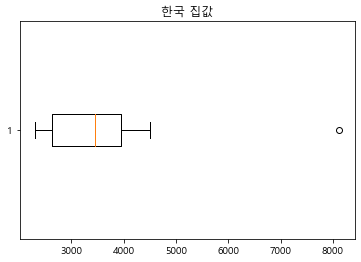

In [20]:
plt.boxplot(국내집값['2020. 01'], vert=False)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구밀도')

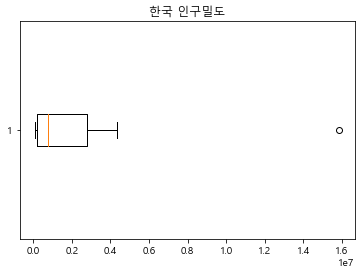

In [21]:
plt.boxplot(국내인구밀도['2020인구밀도'], vert=False)
plt.title('한국 인구밀도')

Text(0.5, 1.0, '한국 집값')

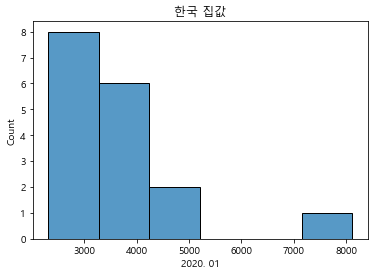

In [22]:
sns.histplot(x='2020. 01', data=국내집값)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 집값')

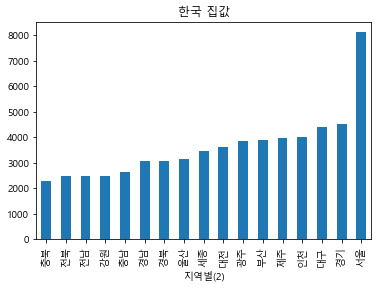

In [23]:
(국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구')

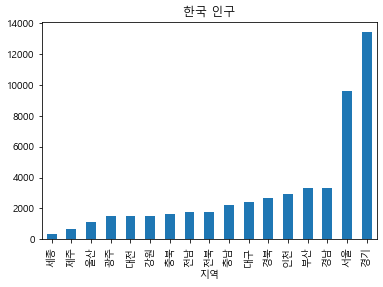

In [24]:
(국내인구밀도['2020인구']).sort_values().plot(kind='bar')
plt.title('한국 인구')

Text(0.5, 1.0, '한국 인구 x 집값')

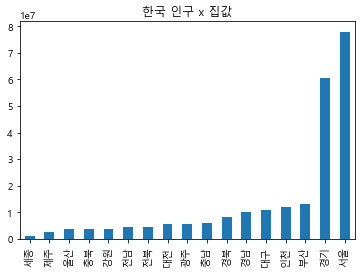

In [25]:
(국내인구밀도['2020인구']*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

Text(0.5, 1.0, '한국 인구 x 집값')

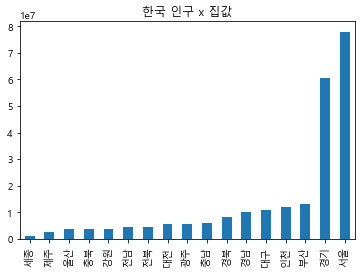

In [26]:
((국내인구밀도['2020인구'])*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

In [27]:
주택거래량 = pd.read_csv('주택거래량.csv',encoding='CP949')
#주택거래량=주택거래량.astype(int)

In [28]:
주택거래량0=주택거래량[주택거래량['년']==2021]
주택거래량1=주택거래량[주택거래량['년']==2020]
주택거래량2=주택거래량[주택거래량['년']==2019]
주택거래량3=주택거래량[주택거래량['년']==2018]
주택거래량4=주택거래량[주택거래량['년']==2017]
주택거래량5=주택거래량[주택거래량['년']==2016]
주택거래량6=주택거래량[주택거래량['년']==2015]
주택거래량7=주택거래량[주택거래량['년']==2014]
주택거래량8=주택거래량[주택거래량['년']==2013]
주택거래량9=주택거래량[주택거래량['년']==2012]

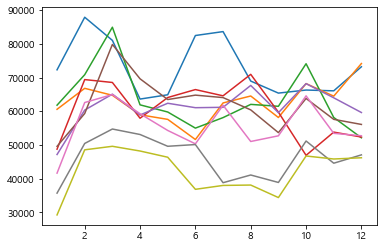

In [29]:
plt.plot(주택거래량1['월'],주택거래량1['전체'])
plt.plot(주택거래량2['월'],주택거래량2['전체'])
plt.plot(주택거래량3['월'],주택거래량3['전체'])
plt.plot(주택거래량4['월'],주택거래량4['전체'])
plt.plot(주택거래량5['월'],주택거래량5['전체'])
plt.plot(주택거래량6['월'],주택거래량6['전체'])
plt.plot(주택거래량7['월'],주택거래량7['전체'])
plt.plot(주택거래량8['월'],주택거래량8['전체'])
plt.plot(주택거래량9['월'],주택거래량9['전체'])

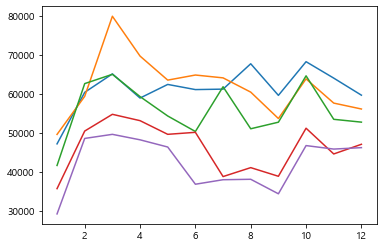

In [30]:
plt.plot(주택거래량5['월'],주택거래량5['전체'])
plt.plot(주택거래량6['월'],주택거래량6['전체'])
plt.plot(주택거래량7['월'],주택거래량7['전체'])
plt.plot(주택거래량8['월'],주택거래량8['전체'])
plt.plot(주택거래량9['월'],주택거래량9['전체'])

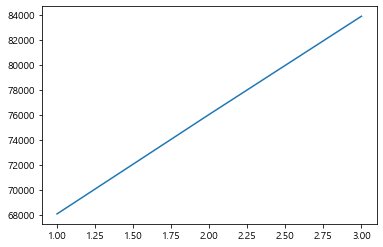

In [31]:
plt.plot(주택거래량0['월'],주택거래량0['전체'])

In [32]:
국내이동1 = pd.read_csv('국내이동1.csv',encoding='CP949')

C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

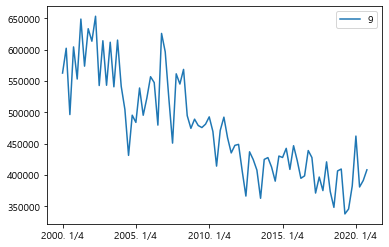

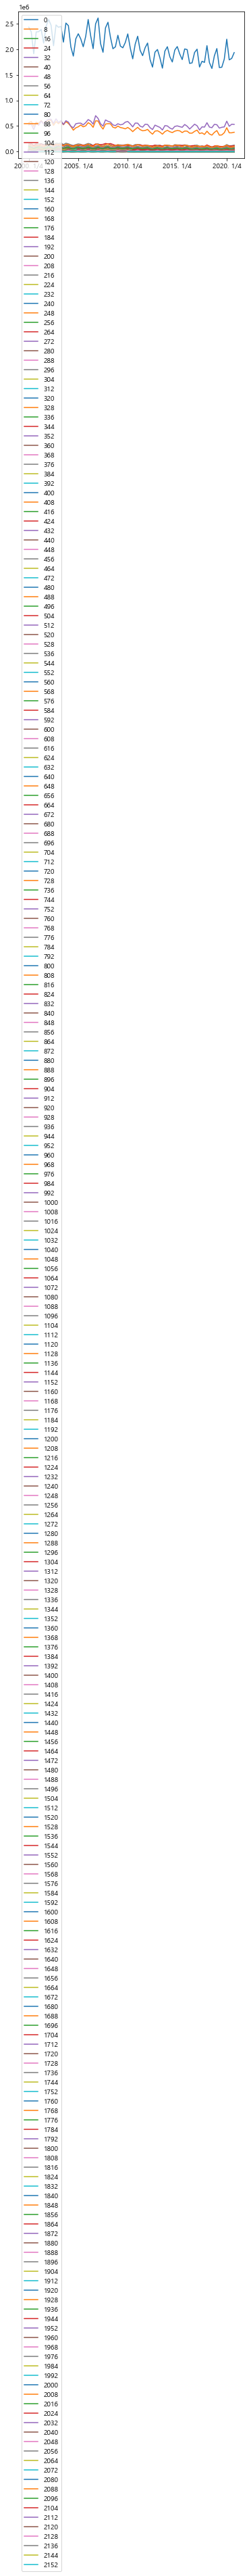

In [33]:
서울총전입 = 국내이동1.loc[(국내이동1['항목']=='총전입')]
del 서울총전입['행정구역(시군구)별']
del 서울총전입['항목']
del 서울총전입['단위']
서울총전출 = 국내이동1.loc[(국내이동1['행정구역(시군구)별']=='서울특별시') & (국내이동1['항목']=='총전출')]
del 서울총전출['행정구역(시군구)별']
del 서울총전출['항목']
del 서울총전출['단위']
서울총전출.transpose().plot()
서울총전입.transpose().plot()

Text(0.5, 1.0, '전입 수')

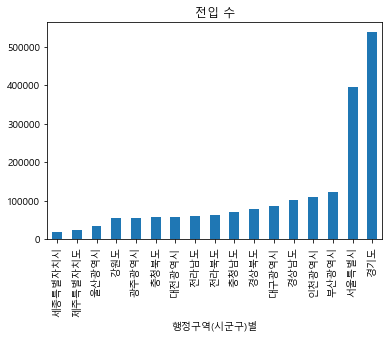

In [34]:
국내전입= 국내이동1.loc[(국내이동1['항목']=='총전입')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전입=국내전입.set_index('행정구역(시군구)별')
국내전입=(국내전입['2020. 1/4']+국내전입['2020. 2/4']+국내전입['2020. 3/4']+국내전입['2020. 4/4'])/4
국내전입.sort_values().plot(kind='bar')

plt.title('전입 수')

Text(0.5, 1.0, '전출 수')

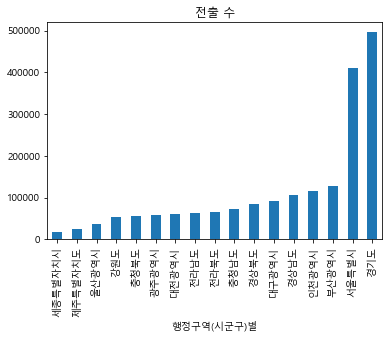

In [35]:
국내전출= 국내이동1.loc[(국내이동1['항목']=='총전출')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전출=국내전출.set_index('행정구역(시군구)별')
국내전출=(국내전출['2020. 1/4']+국내전출['2020. 2/4']+국내전출['2020. 3/4']+국내전출['2020. 4/4'])/4
국내전출.sort_values().plot(kind='bar')
plt.title('전출 수')

Text(0.5, 1.0, '전출-전입 수')

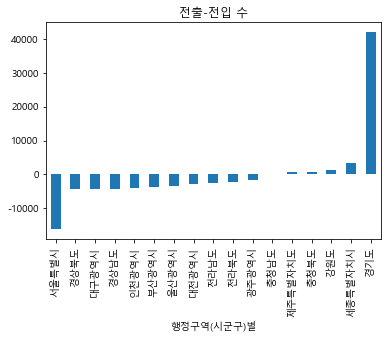

In [36]:
(국내전입-국내전출).sort_values().plot(kind='bar')
plt.title('전출-전입 수')

In [37]:
국내인구=국내인구밀도['2020인구']
국내인구=국내인구.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')
국내인구

지역
서울특별시       9602
부산광역시       3344
대구광역시       2419
인천광역시       2951
광주광역시       1488
대전광역시       1500
울산광역시       1140
세종특별자치시      349
경기도        13405
강원도         1515
충청북도        1632
충청남도        2204
전라북도        1792
전라남도        1764
경상북도        2655
경상남도        3350
제주특별자치도      670
Name: 2020인구, dtype: int32

Text(0.5, 1.0, '전입 수 / 인구 수')

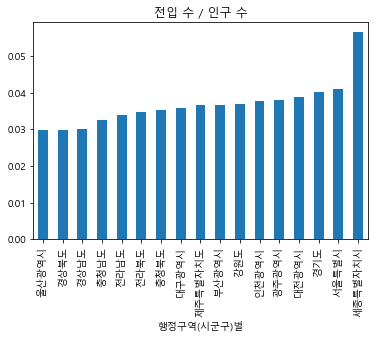

In [38]:
(국내전입/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전입 수 / 인구 수')

Text(0.5, 1.0, '전출 수 / 인구 수')

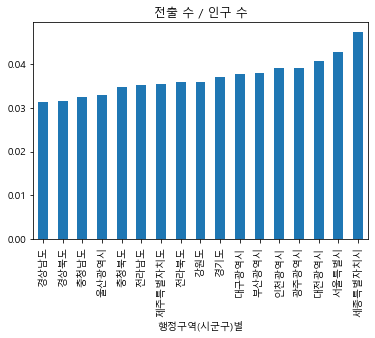

In [39]:
(국내전출/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전출 수 / 인구 수')

Text(0.5, 1.0, '(전출 수 - 전입 수) / 인구 수')

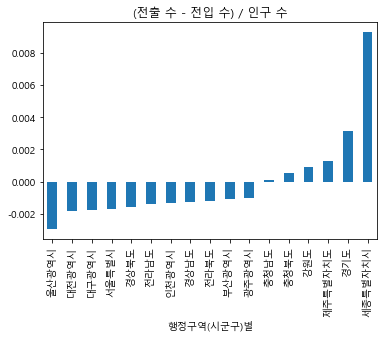

In [40]:
((국내전입-국내전출)/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('(전출 수 - 전입 수) / 인구 수')

Text(0.5, 1.0, '인구 수')

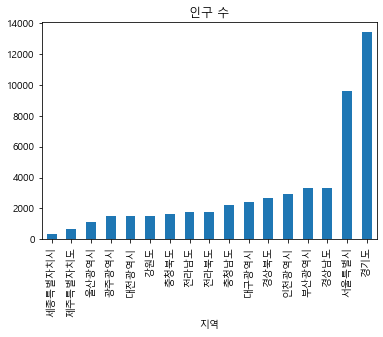

In [41]:
국내인구.sort_values().plot(kind='bar')
plt.title('인구 수')

In [42]:
국내전출입=((국내전입-국내전출)/국내인구*1000)
국내전출입=국내전출입.to_frame(name='value')
국내전출입

,value
행정구역(시군구)별,
서울특별시,-1688.450323
부산광역시,-1072.592703
대구광역시,-1739.871848
인천광역시,-1334.124026
광주광역시,-1022.009409
대전광역시,-1849.500000
울산광역시,-2978.947368
세종특별자치시,9330.229226
경기도,3140.115628


In [43]:
국내집값=국내집값.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')


In [44]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import matplotlib.cm as cm
국내이동2 = pd.read_csv('국내이동2.csv',encoding='CP949')
국내이동2=국내이동2.loc[(국내이동2['항목']=='순이동자수')&(국내이동2['전출지별']!='전국')&(국내이동2['전입지별']!='전국')]
                                        
국내이동2['2020']=국내이동2['2020. 01 월']+국내이동2['2020. 02 월']+국내이동2['2020. 03 월']+국내이동2['2020. 04 월']+국내이동2['2020. 05 월']+국내이동2['2020. 06 월']+국내이동2['2020. 07 월']+국내이동2['2020. 08 월']+국내이동2['2020. 09 월']+국내이동2['2020. 10 월']+국내이동2['2020. 11 월']+국내이동2['2020. 12 월']
국내이동2_1=국내이동2[국내이동2['2020']>0]

국내이동피벗=pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 11 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 12 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 01 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 02 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 03 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 04 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 05 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 06 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 07 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 08 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 09 월')
#
국내이동피벗2=국내이동피벗/(국내인구)

국내이동피벗

전입지별,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0,-1317,-775,-1413,-254,-861,274,-539,-982,281,-580,-2386,-489,-69,-163,240,-770
경기도,1317,0,-11569,-14969,-6465,-12410,-7609,-10790,-208671,528,-5649,-32905,-4886,-6453,2552,-7447,-335
경상남도,775,11569,0,742,290,2271,1618,-4167,13661,616,-1070,1341,1098,572,573,1811,1386
경상북도,1413,14969,-742,0,84,-370,2301,1632,11840,1010,-4192,834,219,361,386,2424,2352
광주광역시,254,6465,-290,-84,0,-126,723,74,8008,589,-32,660,-5832,-604,83,993,449
대구광역시,861,12410,-2271,370,126,0,1232,1525,12497,706,-646,1029,76,53,529,1490,1332
대전광역시,-274,7609,-1618,-2301,-723,-1232,0,-536,8001,13183,-333,202,-719,-1306,206,-466,1007
부산광역시,539,10790,4167,-1632,-74,-1525,536,0,15117,698,-4844,1149,164,355,10,1327,589
서울특별시,982,208671,-13661,-11840,-8008,-12497,-8001,-15117,0,603,-5794,2457,-5760,-6988,853,-3265,-3247


In [45]:
국내이동피벗2.round(2)

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0.00,-0.10,-0.23,-0.53,-0.17,-0.36,0.18,-0.16,-0.10,0.81,-0.51,-0.81,-0.28,-0.04,-0.24,0.11,-0.47
경기도,0.87,0.00,-3.45,-5.64,-4.34,-5.13,-5.07,-3.23,-21.73,1.51,-4.96,-11.15,-2.77,-3.60,3.81,-3.38,-0.21
경상남도,0.51,0.86,0.00,0.28,0.19,0.94,1.08,-1.25,1.42,1.77,-0.94,0.45,0.62,0.32,0.86,0.82,0.85
경상북도,0.93,1.12,-0.22,0.00,0.06,-0.15,1.53,0.49,1.23,2.89,-3.68,0.28,0.12,0.20,0.58,1.10,1.44
광주광역시,0.17,0.48,-0.09,-0.03,0.00,-0.05,0.48,0.02,0.83,1.69,-0.03,0.22,-3.31,-0.34,0.12,0.45,0.28
대구광역시,0.57,0.93,-0.68,0.14,0.08,0.00,0.82,0.46,1.30,2.02,-0.57,0.35,0.04,0.03,0.79,0.68,0.82
대전광역시,-0.18,0.57,-0.48,-0.87,-0.49,-0.51,0.00,-0.16,0.83,37.77,-0.29,0.07,-0.41,-0.73,0.31,-0.21,0.62
부산광역시,0.36,0.80,1.24,-0.61,-0.05,-0.63,0.36,0.00,1.57,2.00,-4.25,0.39,0.09,0.20,0.01,0.60,0.36
서울특별시,0.65,15.57,-4.08,-4.46,-5.38,-5.17,-5.33,-4.52,0.00,1.73,-5.08,0.83,-3.27,-3.90,1.27,-1.48,-1.99


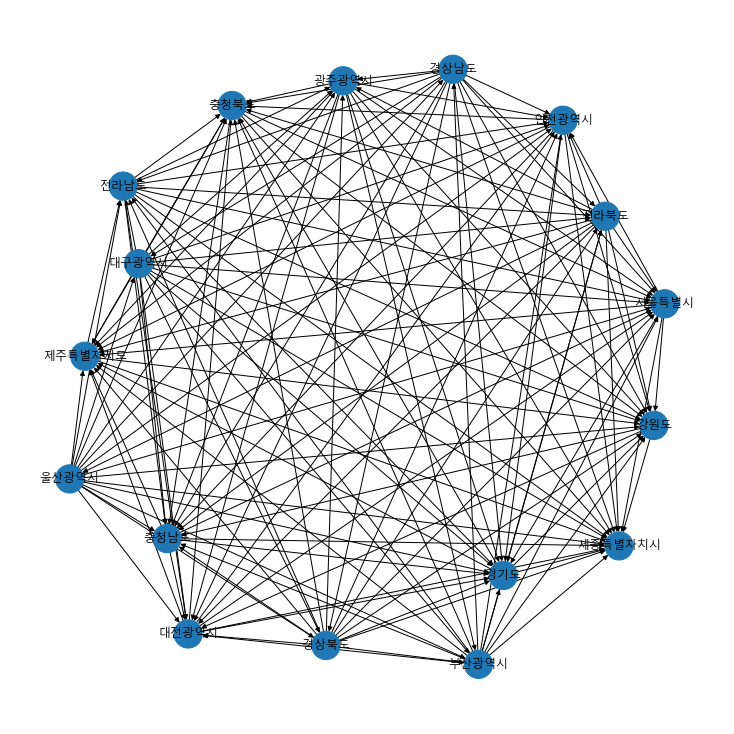

In [46]:

G_net = nx.from_pandas_edgelist(국내이동2_1, source = '전출지별', target = '전입지별', edge_attr = '2020',create_using = nx.DiGraph())

d = dict(G_net.degree)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G_net,10)
#for edge in G_net.edges(data='2020'):
nx.draw(G_net, pos,font_family=font_name, node_size = [(50*v) for v in d.values()], with_labels = True)
plt.show()

<AxesSubplot:xlabel='전입지별', ylabel='전출지별'>

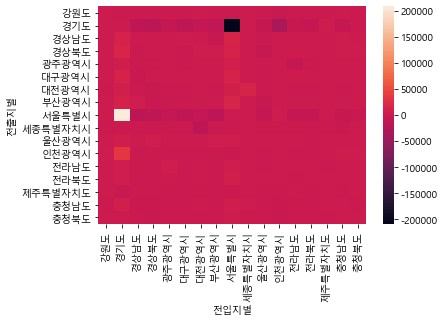

In [47]:
sns.heatmap(국내이동피벗  )

In [48]:
이주분석 = pd.read_csv('이주분석.csv',encoding='CP949')
이주분석=이주분석.set_index('응답자특성')
이주분석=이주분석.astype(float)
이주분석

,이주 계획 있음17,이주 계획 없음17,창녕군 내 타 읍면17,타 시군 농촌17,타 시군 도시17,1년 이내17,1~3년 이내17,3~5년 이내17,5년 이후17,경제적 문제17,...,3~5년 이내19,5년 이후19,경제적 문제19,주택 문제19,자녀 교육19,생활 편의시설 부족19,환경문제19,사업장 또는 직장19,마을주민과의 갈등문제19,기타19
응답자특성,,,,,,,,,,,,,,,,,,,,,
소계,14.9,85.1,16.1,17.2,66.7,16.1,43.5,18.3,22.0,9.1,...,21.0,41.0,17.5,8.5,10.5,13.0,8.5,33.0,4.0,5.0
귀농(농가),8.0,92.0,36.6,22.0,41.5,14.6,48.8,17.1,19.5,9.8,...,14.3,57.1,31.4,8.6,8.6,2.9,17.1,14.3,11.4,5.7
귀촌(비농가),19.6,80.4,10.3,15.9,73.8,16.6,42.1,18.6,22.8,9.0,...,22.4,37.6,14.6,8.5,10.9,15.2,6.7,37.0,2.4,4.9
남자,16.2,83.8,15.1,18.9,66.0,15.1,39.6,23.6,21.7,10.4,...,20.6,40.2,15.0,7.5,8.4,12.2,8.4,41.1,3.7,3.7
여자,13.4,86.6,17.5,15.0,67.5,17.5,48.8,11.3,22.5,7.5,...,21.5,41.9,20.4,9.7,12.9,14.0,8.6,23.7,4.3,6.5
19~29세,36.5,63.5,6.5,3.2,90.3,19.4,38.7,32.3,9.7,14.7,...,13.6,36.4,4.6,4.6,9.1,4.6,4.6,59.1,0.0,13.6
30~39세,31.3,68.7,13.0,4.3,82.6,10.9,45.7,15.2,28.3,4.3,...,23.3,39.5,9.3,14.0,23.3,9.3,4.7,39.5,0.0,0.0
40~49세,15.1,84.9,18.2,22.7,59.1,22.7,36.4,22.7,18.2,9.1,...,22.2,33.3,8.3,8.3,22.2,22.2,2.8,36.1,0.0,0.0
50~59세,11.3,88.7,22.7,27.3,50.0,15.9,43.2,15.9,25.0,9.1,...,21.7,45.0,28.3,6.7,1.7,10.0,11.7,31.7,6.7,3.3


C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: Matplotli

<AxesSubplot:ylabel='50~59세'>

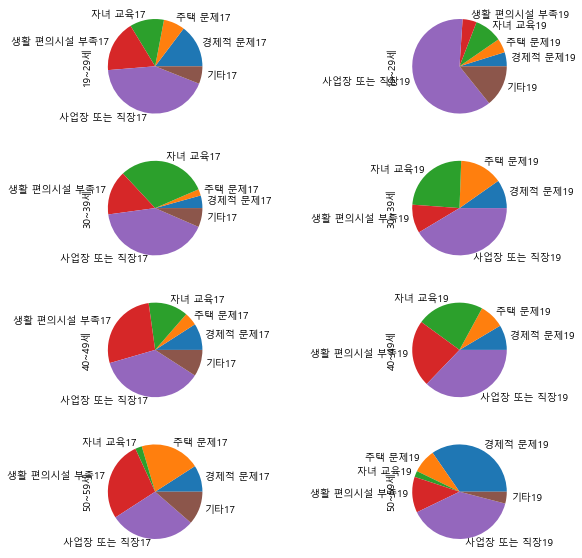

In [49]:
import platform
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(421)
이주분석.loc['19~29세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(422)
이주분석.loc['19~29세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(423)
이주분석.loc['30~39세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(424)
이주분석.loc['30~39세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(425)
이주분석.loc['40~49세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(426)
이주분석.loc['40~49세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(427)
이주분석.loc['50~59세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(428)
이주분석.loc['50~59세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')


C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='50~59세'>

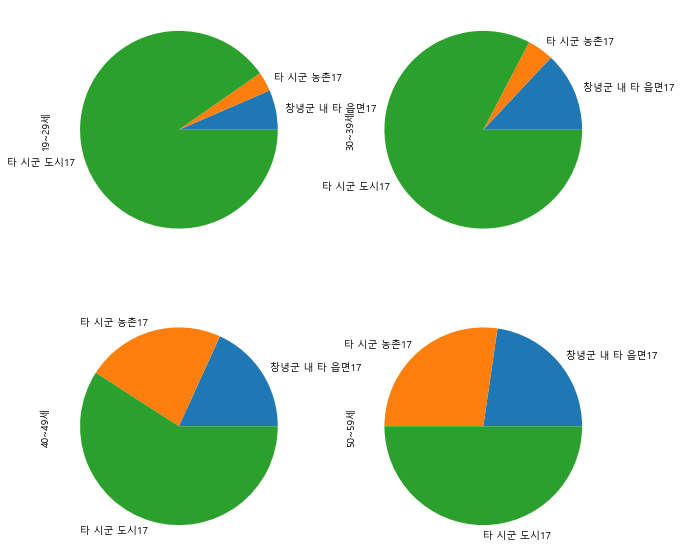

In [50]:
plt.subplot(221)
이주분석.loc['19~29세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(222)
이주분석.loc['30~39세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(223)
이주분석.loc['40~49세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(224)
이주분석.loc['50~59세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')

In [51]:
국내이동1_2= pd.read_csv('국내이동1.csv',encoding='CP949')
국내이동1_2=국내이동1_2.set_index('행정구역(시군구)별')

In [52]:
국내총전출=국내이동1_2.loc[국내이동1_2['항목']=='총전출']
국내총전입=국내이동1_2.loc[국내이동1_2['항목']=='총전입']

In [53]:
국내총전입=국내총전입.drop(['항목','단위'],axis=1)
국내총전출=국내총전출.drop(['항목','단위'],axis=1)
국내총이동=국내총전입/국내총전출

C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

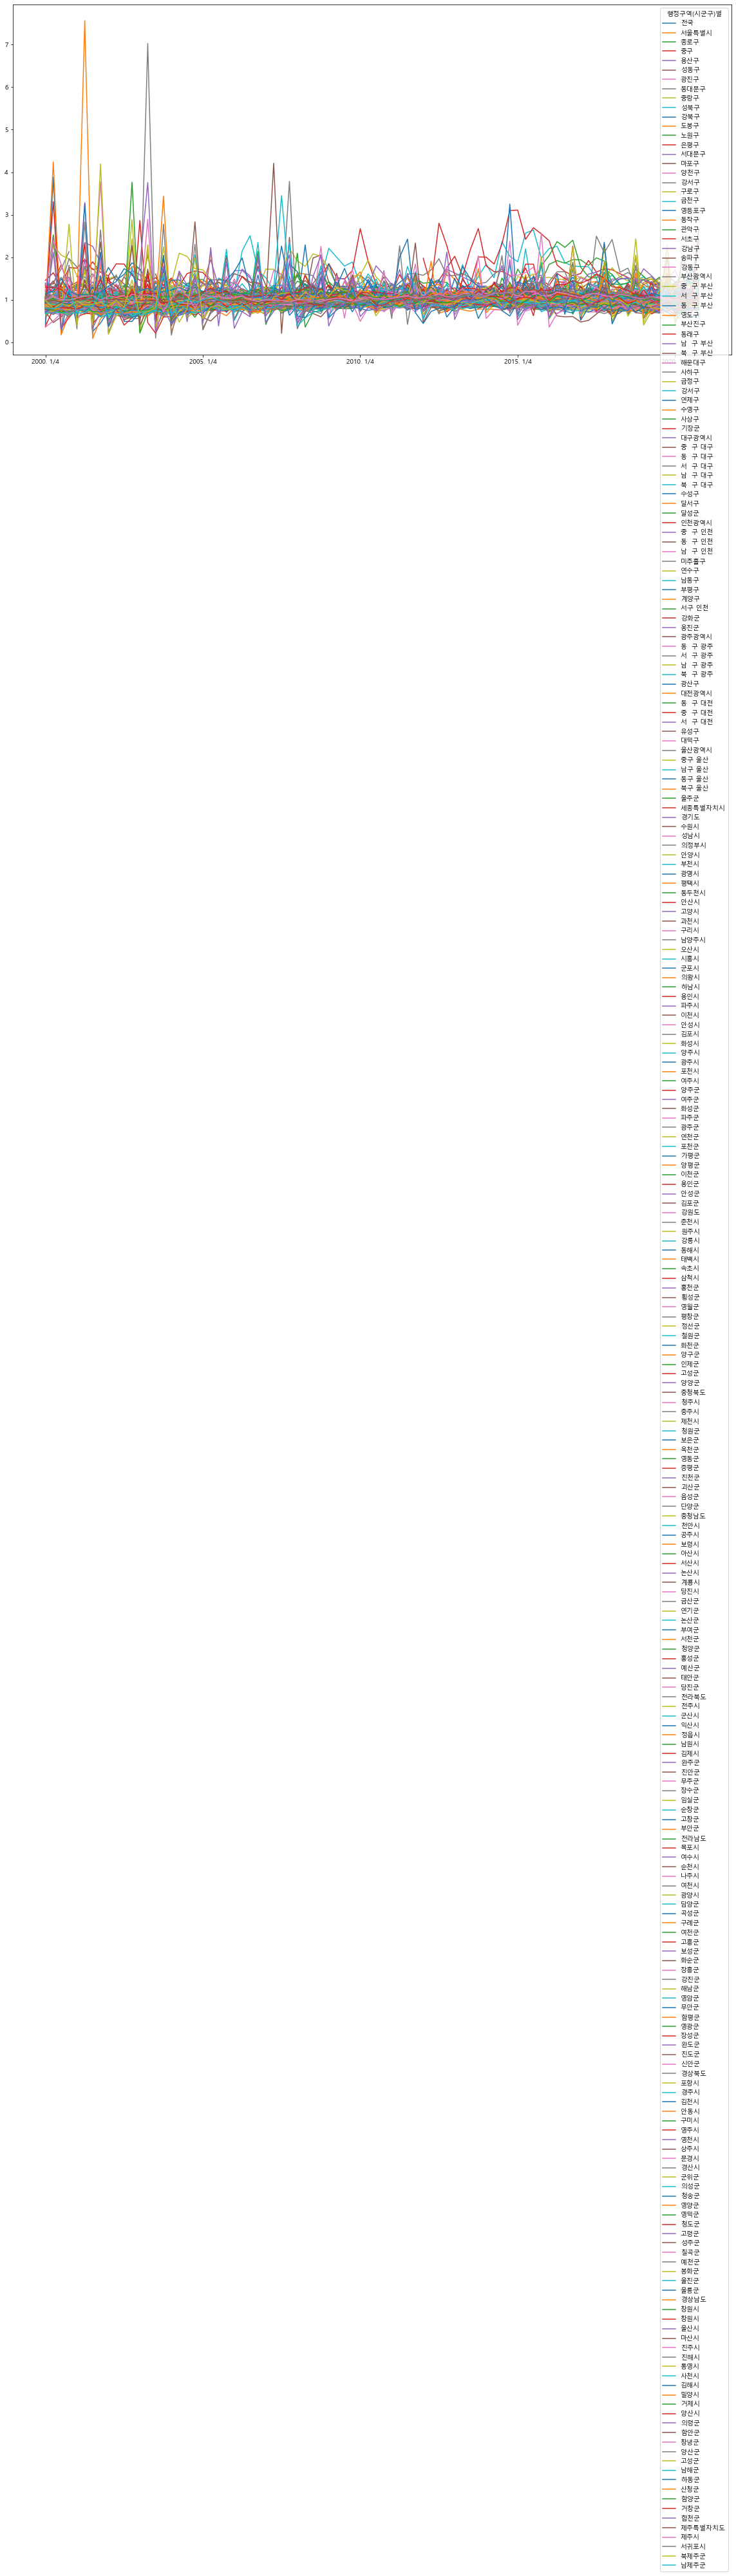

In [54]:
plt.rcParams["figure.figsize"] = (20,10)
국내총이동.transpose().plot()

C:\Users\KimSungYong\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


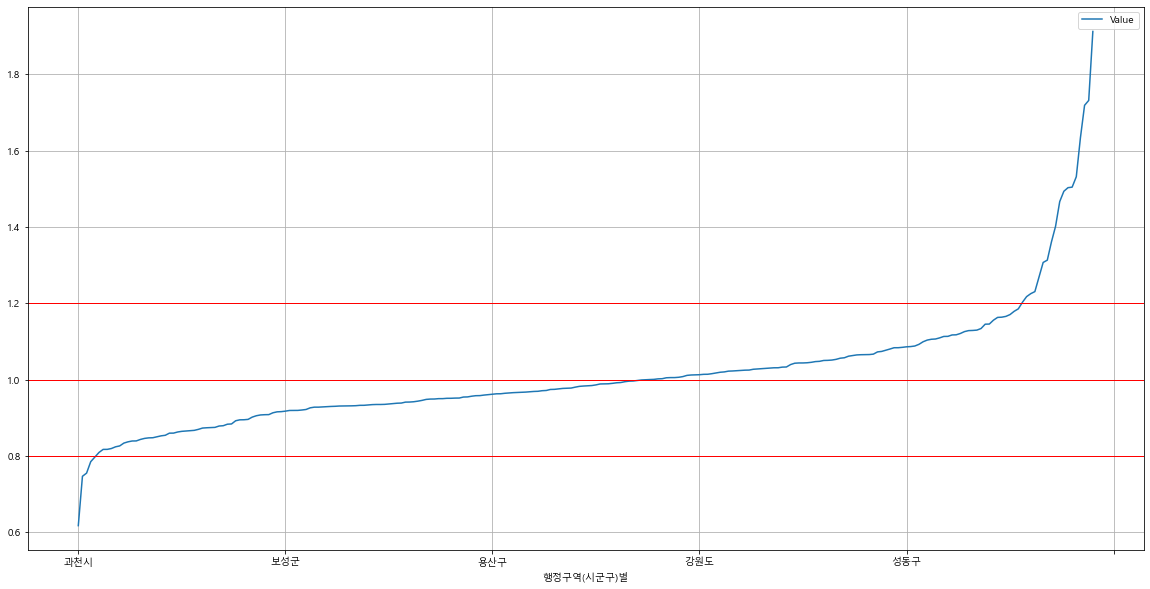

In [55]:
국내총이동17=((국내총이동['2017. 1/4']+국내총이동['2017. 2/4']+국내총이동['2017. 3/4']+국내총이동['2017. 4/4'])/4)
국내총이동17=국내총이동17.to_frame()
국내총이동17.columns=['Value']
국내총이동17=국내총이동17.sort_values(by=['Value'])
국내총이동17=국내총이동17.dropna()
국내총이동17.plot()
plt.axhline(y=1, color='r', linewidth=1)
plt.axhline(y=1.2, color='r', linewidth=1)
plt.axhline(y=0.8, color='r', linewidth=1)
plt.grid(True)

<AxesSubplot:xlabel='행정구역(시군구)별'>

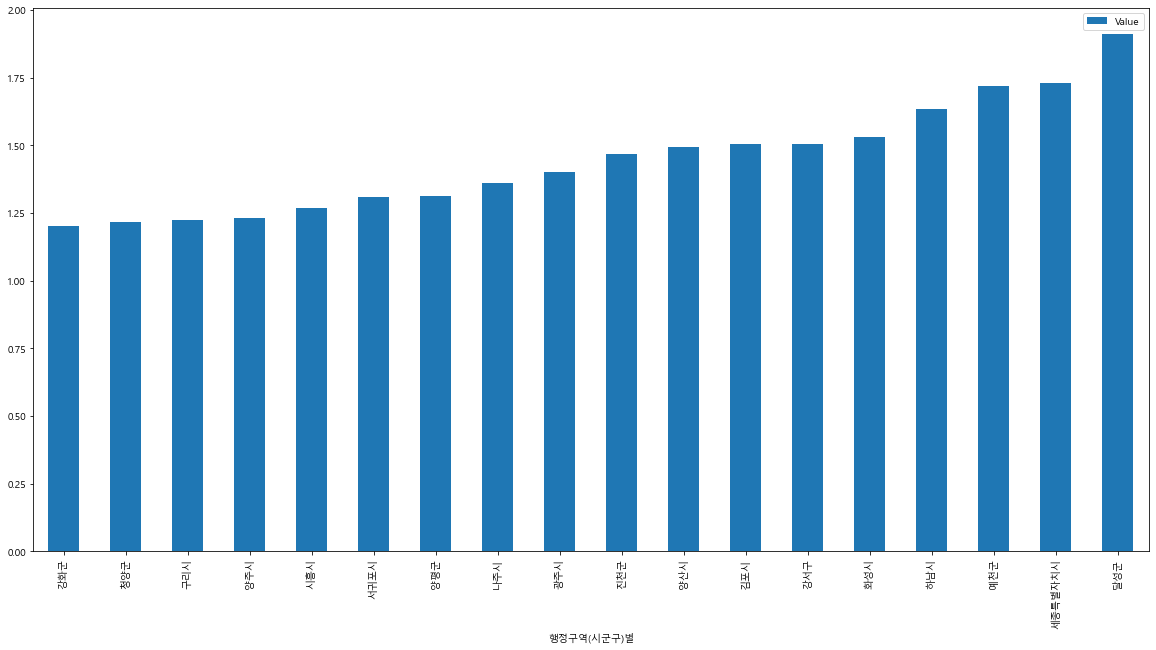

In [56]:
국내총이동17.loc[국내총이동17['Value']>=1.2].plot(kind='bar')

<AxesSubplot:xlabel='행정구역(시군구)별'>

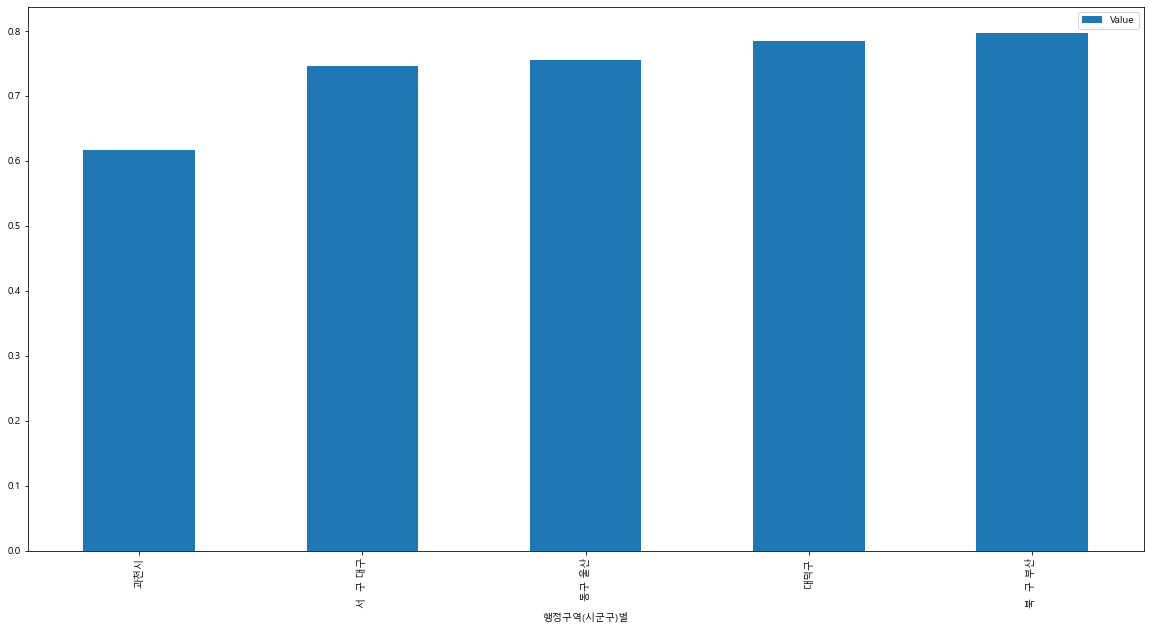

In [57]:
국내총이동17.loc[국내총이동17['Value']<=0.8].plot(kind='bar')

In [58]:
경제활동인구 = pd.read_csv('요인/경제활동인구.csv',encoding='CP949')
산업체= pd.read_csv('요인/산업체.csv',encoding='CP949')
생활만족도= pd.read_csv('요인/생활만족도.csv',encoding='CP949')
여가프로그램= pd.read_csv('요인/여가프로그램.csv',encoding='CP949')
여가시설= pd.read_csv('요인/여가시설.csv',encoding='CP949')
취업자= pd.read_csv('요인/취업자.csv',encoding='CP949')
프렌차이즈= pd.read_csv('요인/프렌차이즈.csv',encoding='CP949')
대학생= pd.read_csv('요인/대학생.csv',encoding='CP949')
대학= pd.read_csv('요인/대학.csv',encoding='CP949')
경제활동인구=경제활동인구.set_index('시도별')
#산업체=산업체.set_index('행정구역별')
산업체1=산업체.set_index('산업별')
생활만족도=생활만족도.set_index('행정구역별')
여가시설=여가시설.loc[여가시설['통계분류(1)']=='17개 시도별']
여가시설=여가시설.set_index('통계분류(2)')
여가프로그램=여가프로그램.loc[여가프로그램['통계분류(1)']=='17개 시도별']
여가프로그램=여가프로그램.set_index('통계분류(2)')
취업자=취업자.set_index('졸업지역별(1)')
프렌차이즈=프렌차이즈.set_index('시도별')
대학=대학.set_index('행정구역별')
대학생=대학생.set_index('행정구역별')

In [59]:
경제활동인구=경제활동인구.loc[경제활동인구['교육정도별']=='계']
경제활동인구=경제활동인구.drop(['계'])
생활만족도=생활만족도.loc[생활만족도['특성별']=='계']
#경제활동인구['2021']
경제활동인구

,교육정도별,경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%)
시도별,,,,
서울특별시,계,5288,3244,62.0
부산광역시,계,1710,1235,58.1
대구광역시,계,1252,834,60.0
인천광역시,계,1632,916,64.0
광주광역시,계,779,498,61.0
대전광역시,계,814,470,63.4
울산광역시,계,581,383,60.3
세종특별자치시,계,185,107,63.3
경기도,계,7178,4357,62.2


In [60]:
인구변동=(국내전입-국내전출)/(국내인구*1000)
인구변동=인구변동.to_frame()
인구변동.columns=['value']

국내인구=국내인구.to_frame()
국내인구.columns=['인구']
인구변동

,value
행정구역(시군구)별,
서울특별시,-0.001688
부산광역시,-0.001073
대구광역시,-0.001740
인천광역시,-0.001334
광주광역시,-0.001022
대전광역시,-0.001850
울산광역시,-0.002979
세종특별자치시,0.009330
경기도,0.003140


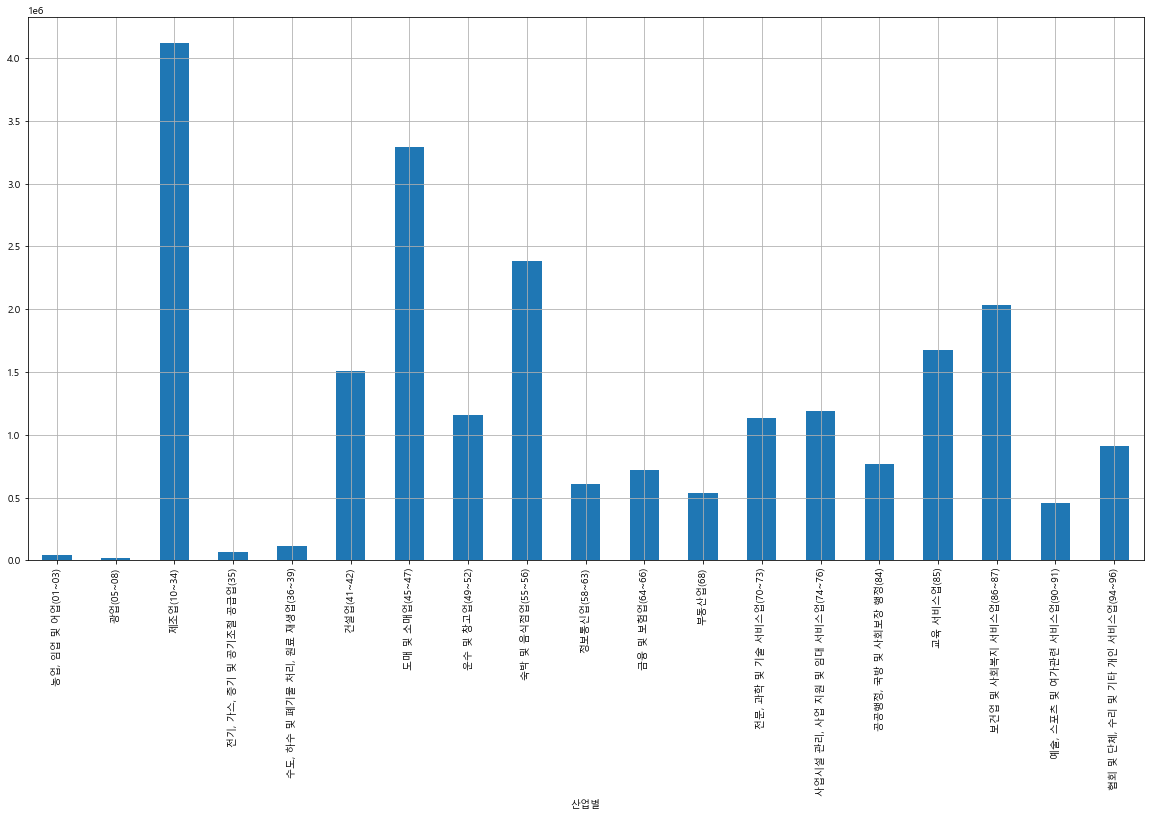

In [61]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='전국']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

In [62]:
산업체1

,행정구역별,종사자규모별,항목,단위,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
산업별,,,,,,,,,,,,,,
전체 산업,전국,계,사업체수,개,3355459,3470023,3602461,3676859,3812800,3874156,3950169,4019872,4103172,4176549
전체 산업,전국,계,종사자수,명,17646973,18093127,18569256,19173387,19899697,20889239,21259126,21626904,22234776,22723272
전체 산업,전국,1 - 4명,사업체수,개,2804612,2879668,2963367,3005238,3099808,3125589,3173185,3228202,3274152,3322812
전체 산업,전국,1 - 4명,종사자수,명,5075161,5211805,5298493,5377943,5586586,5602005,5705519,5847700,5878444,6041327
전체 산업,전국,5 - 9명,사업체수,개,283153,316658,366257,384596,414513,434111,454806,466829,491200,511446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,300 - 499명,종사자수,명,0,0,0,0,0,0,0,0,0,0
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,500 - 999명,사업체수,개,0,0,0,0,0,0,1,0,0,0
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,500 - 999명,종사자수,명,0,0,0,0,0,0,0,0,0,0


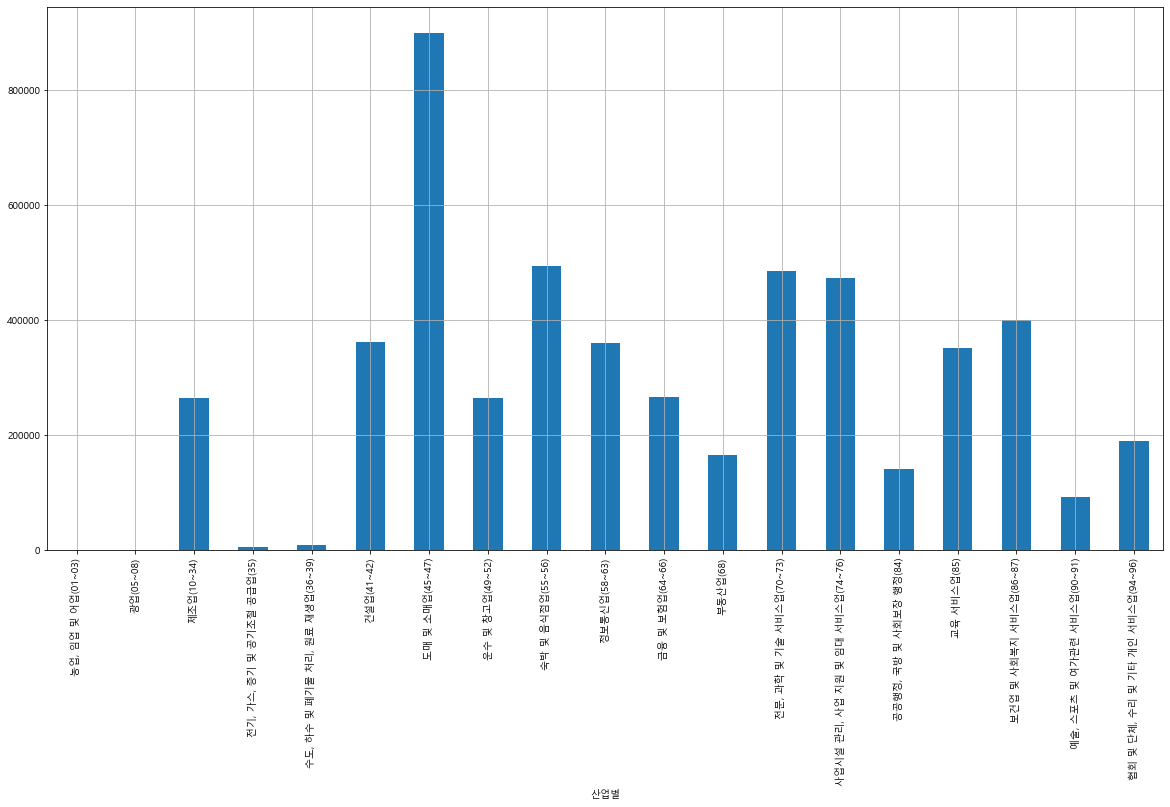

In [63]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='서울특별시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

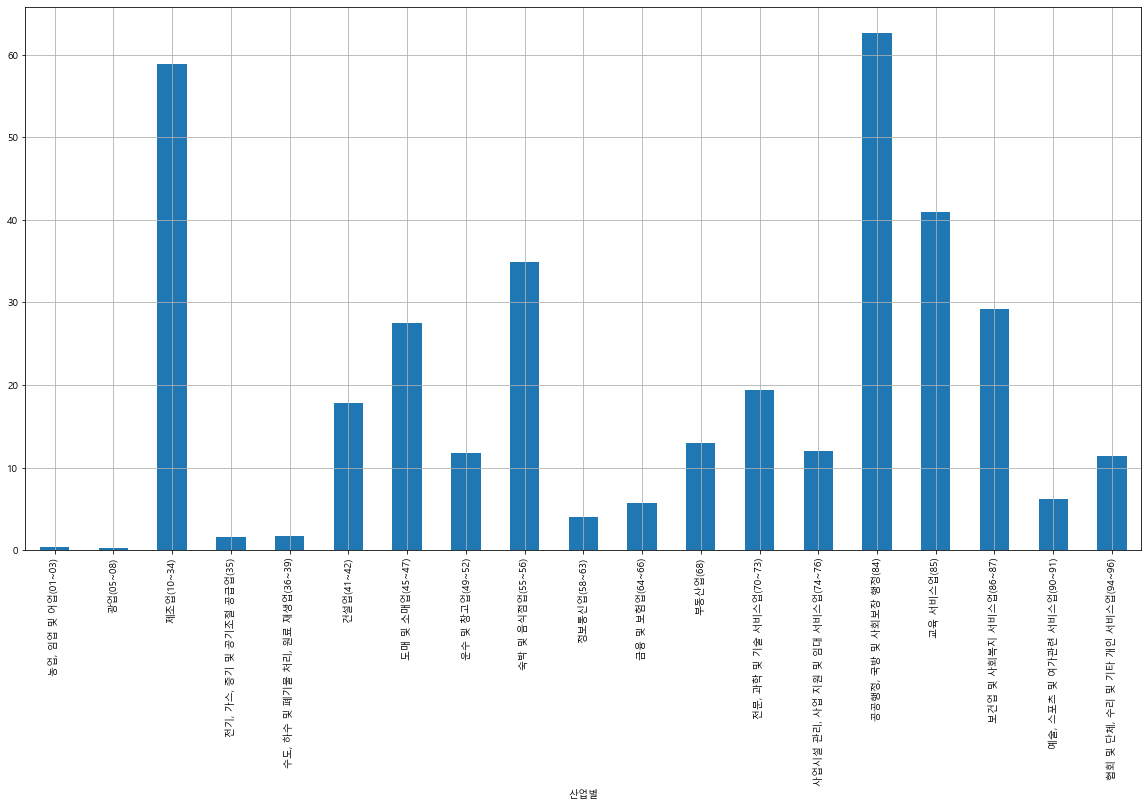

In [64]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='세종특별자치시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['세종특별자치시'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

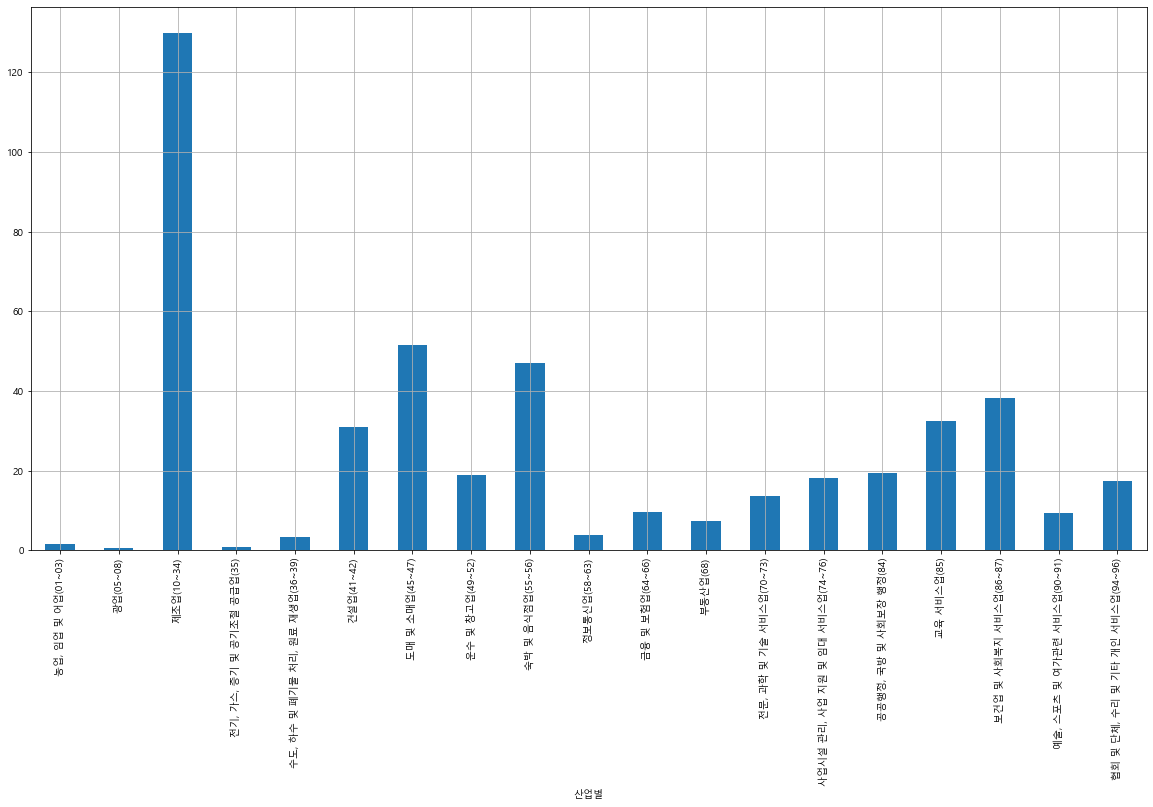

In [65]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='충청북도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['충청북도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

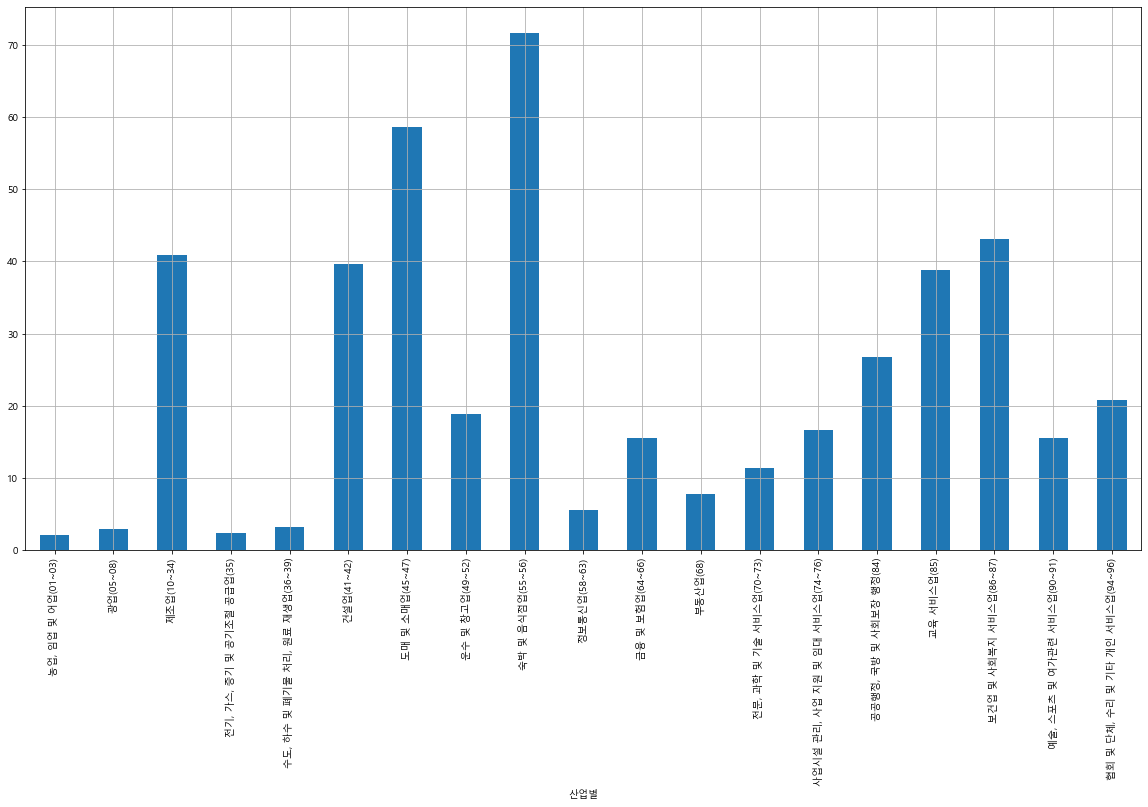

In [66]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='강원도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['강원도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

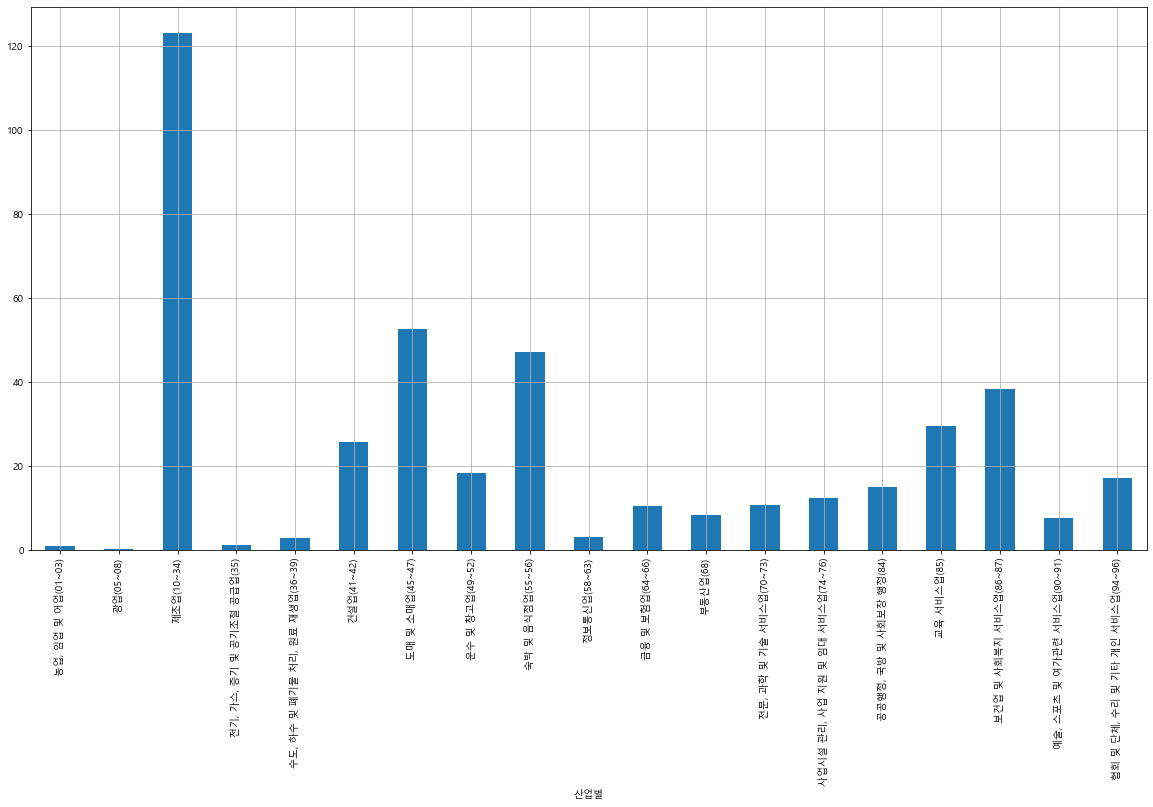

In [67]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='경상남도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['경상남도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

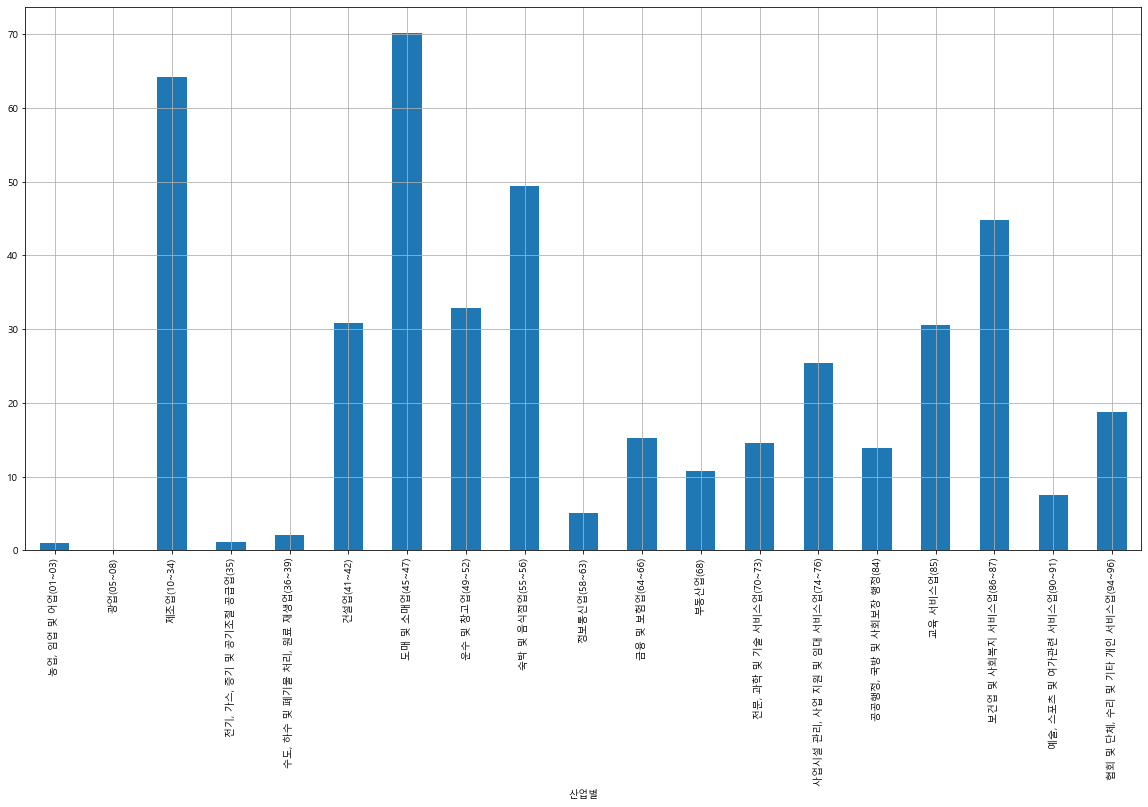

In [68]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='부산광역시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['부산광역시'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

<AxesSubplot:xlabel='지역'>

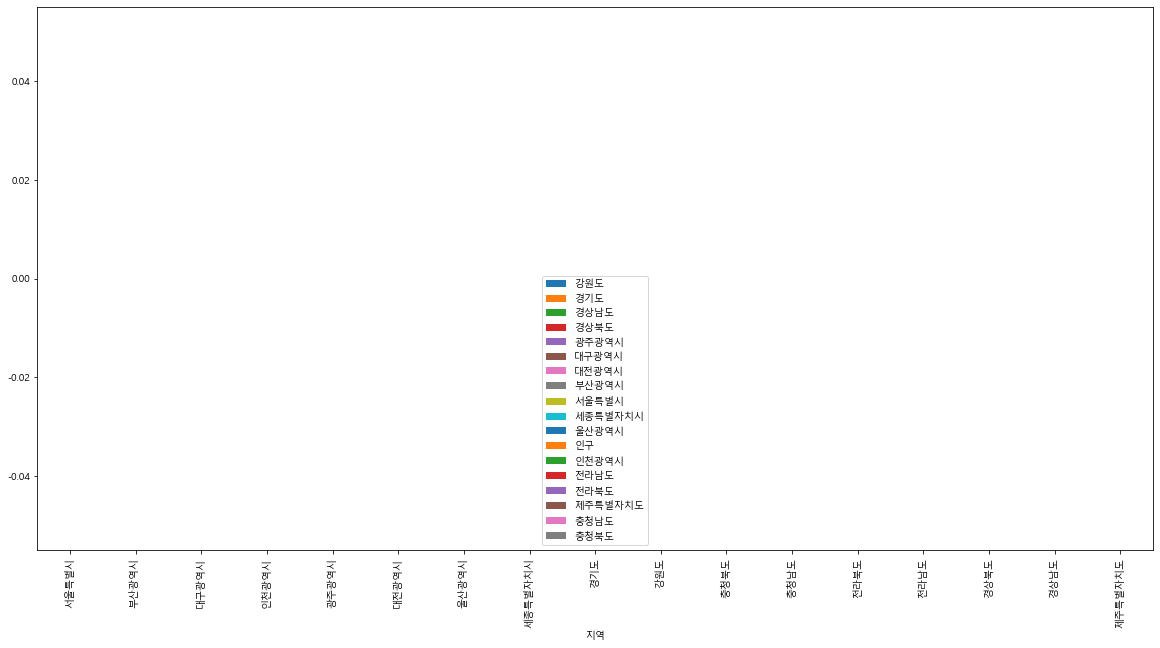

In [122]:
산업체1_2=산업체.set_index('행정구역별')
산업체1_2=산업체1_2.loc[산업체1_2['종사자규모별']=='계']
산업체1_2=산업체1_2.loc[산업체1_2['항목']=='종사자수']
산업체1_2=산업체1_2.drop('전국')

<AxesSubplot:xlabel='행정구역별'>

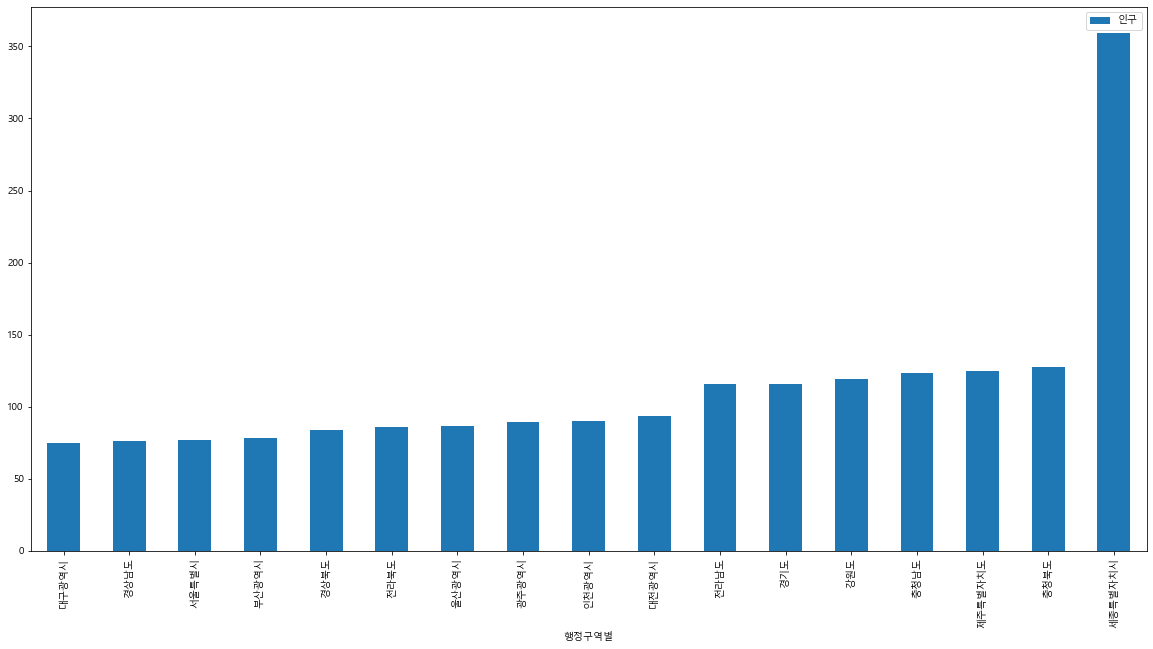

In [119]:
산업변화=((산업체1_2['2019 년'].loc[산업체1_2['산업별']=='전체 산업']-산업체1_2['2010 년'].loc[산업체1_2['산업별']=='전체 산업'])).to_frame()
산업변화.columns=['인구']
산업변화=산업변화/국내인구
산업변화.sort_values(by=['인구']).plot(kind='bar')

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


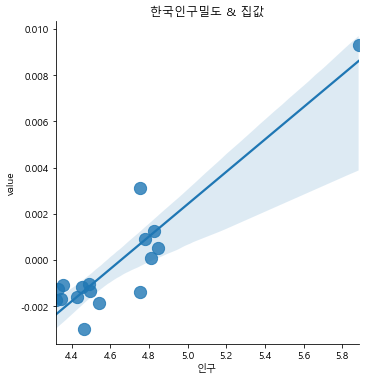

In [125]:
data = pd.concat([np.log(산업변화),인구변동],axis=1)
g=sns.lmplot('인구','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

In [72]:
len(산업체.행정구역별.unique())

18

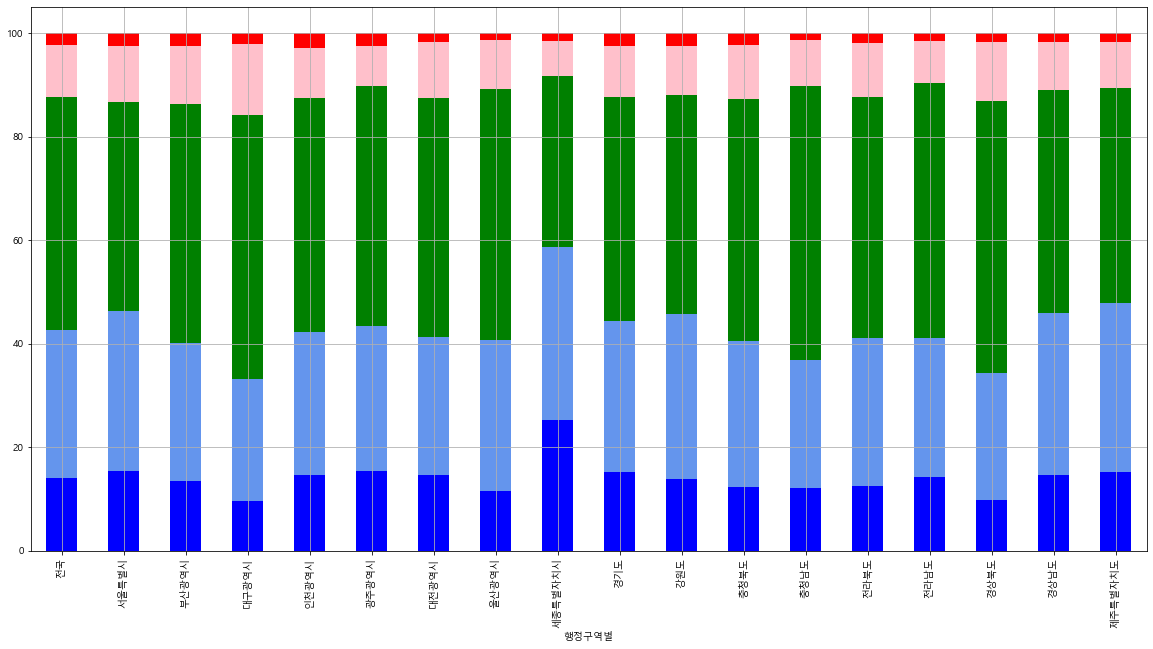

In [73]:
생활만족도2=생활만족도.loc[생활만족도['특성별']=='계']
생활만족도2=생활만족도2.loc[생활만족도2['항목']!='계']
b=생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족']
c=b+생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족']
d=c+생활만족도2['2020 년'].loc[생활만족도2['항목']=='보통']
e=d+생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족']
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족'].plot(kind='bar',color='blue',bottom=0)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족'].plot(kind='bar',color='cornflowerblue',bottom=b)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='보통'].plot(kind='bar',color='green',bottom=c)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족'].plot(kind='bar',color='pink',bottom=d)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 불만족'].plot(kind='bar',color='red',bottom=e)
plt.grid(True)

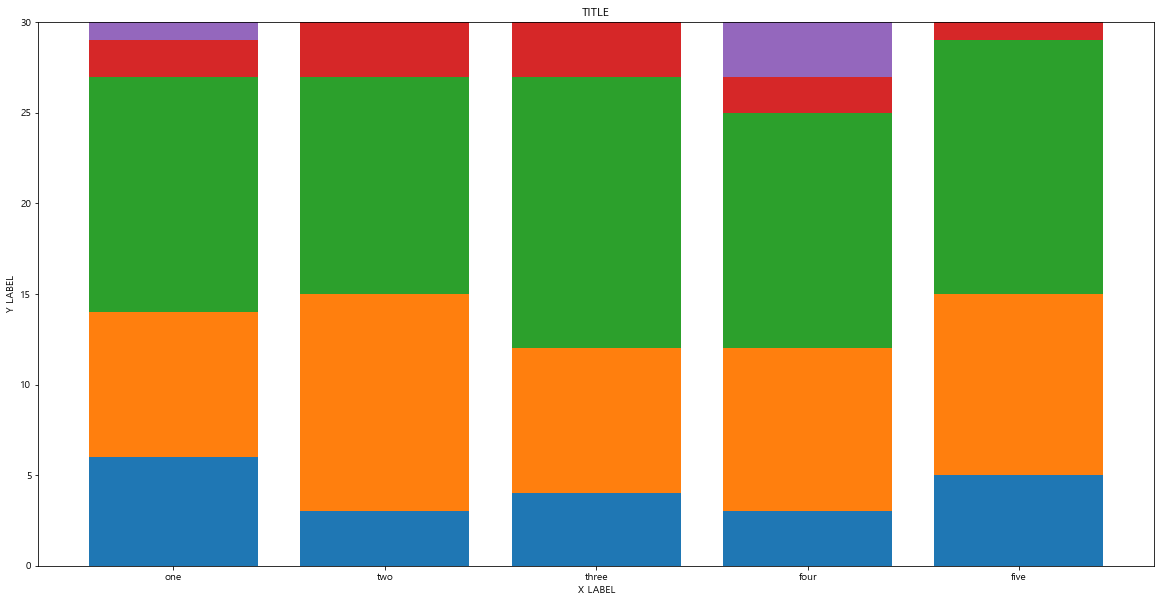

In [74]:
from matplotlib import pyplot as plt
import numpy as np
topics = ['one', 'two', 'three', 'four', 'five']
As = [6, 3, 4, 3, 5]
Bs = [8, 12, 8, 9, 10]
Cs = [13, 12, 15, 13, 14]
Ds = [2, 3, 3, 2, 1]
Fs = [1, 0, 0, 3, 0]
c_bottom = np.add(As, Bs)
d_bottom = np.add(c_bottom, Cs)
f_bottom = np.add(d_bottom, Ds)
x = range(len(topics))
plt.bar(x, As)
plt.bar(x, Bs, bottom=As)
plt.bar(x, Cs, bottom=c_bottom)
plt.bar(x, Ds, bottom=d_bottom)
plt.bar(x, Fs, bottom=f_bottom)
ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)
plt.title('TITLE')
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')
plt.show()

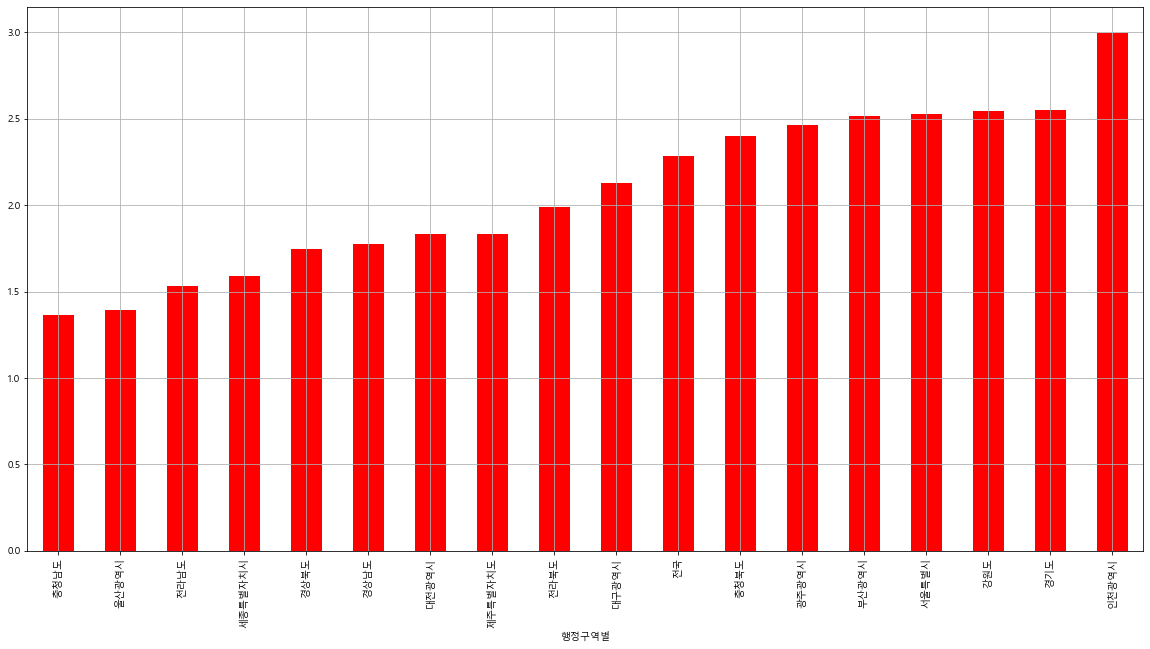

In [75]:
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 불만족'].sort_values().plot(kind='bar',color='red')
plt.grid(True)

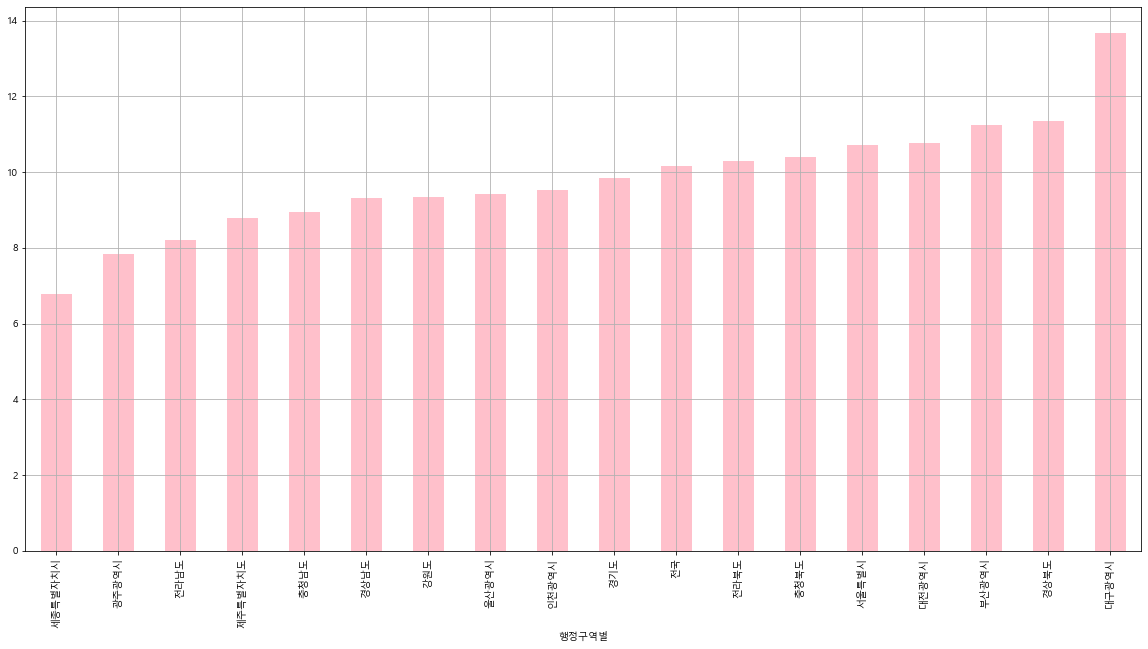

In [76]:
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족'].sort_values().plot(kind='bar',color='pink')
plt.grid(True)

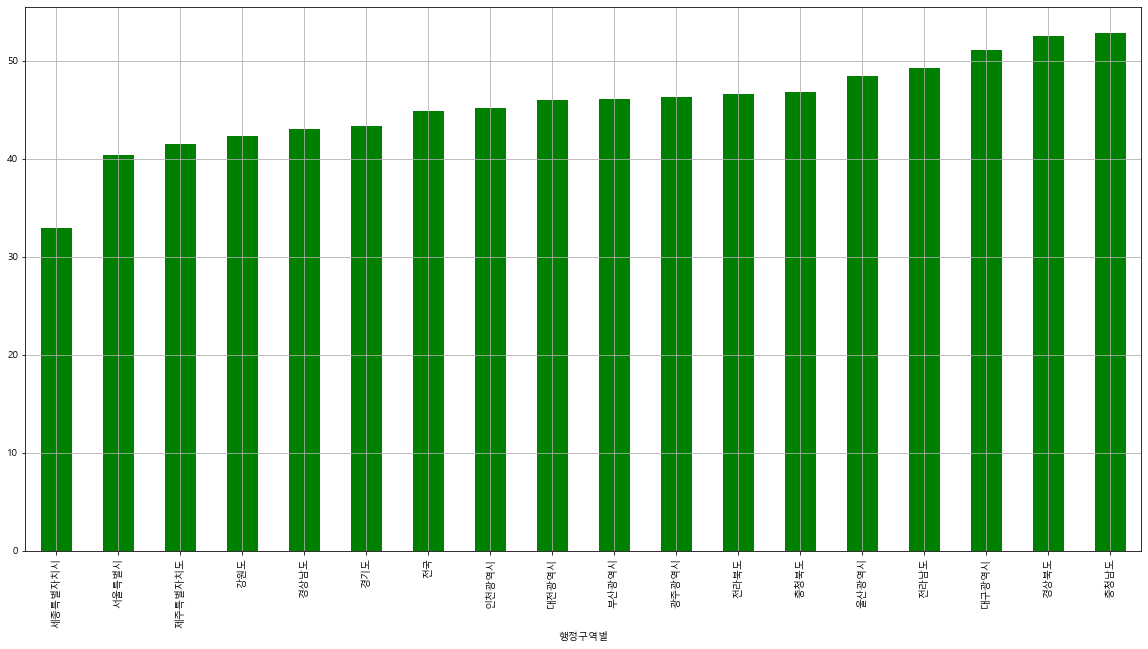

In [77]:
생활만족도2['2020 년'].loc[생활만족도2['항목']=='보통'].sort_values().plot(kind='bar',color='green')
plt.grid(True)

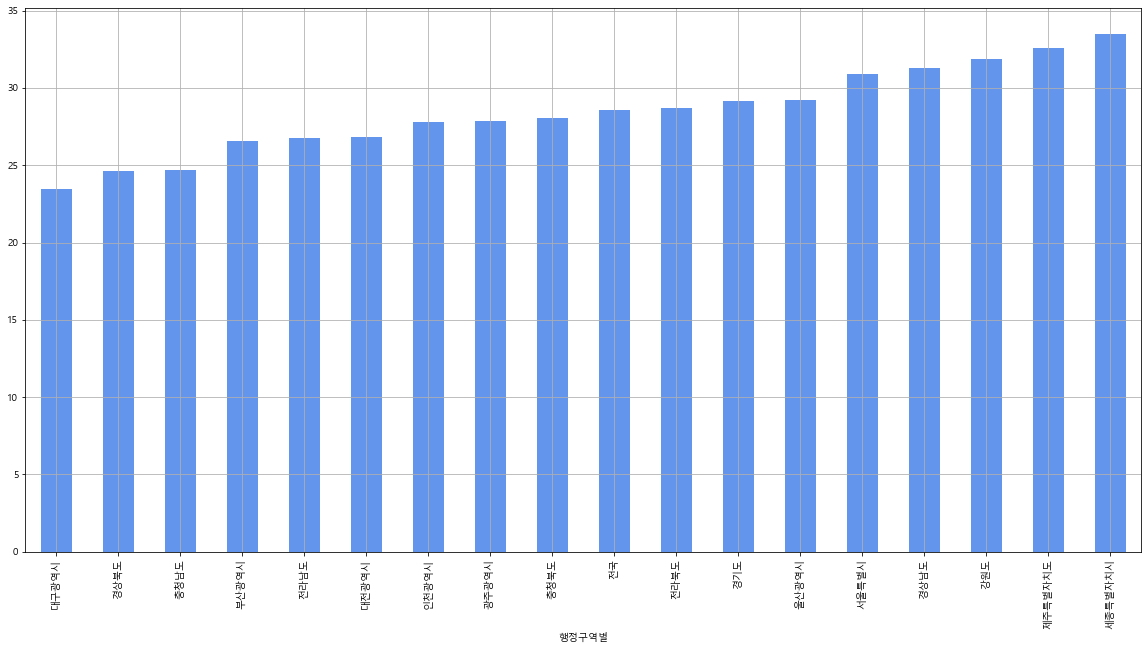

In [78]:
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족'].sort_values().plot(kind='bar',color='cornflowerblue')
plt.grid(True)

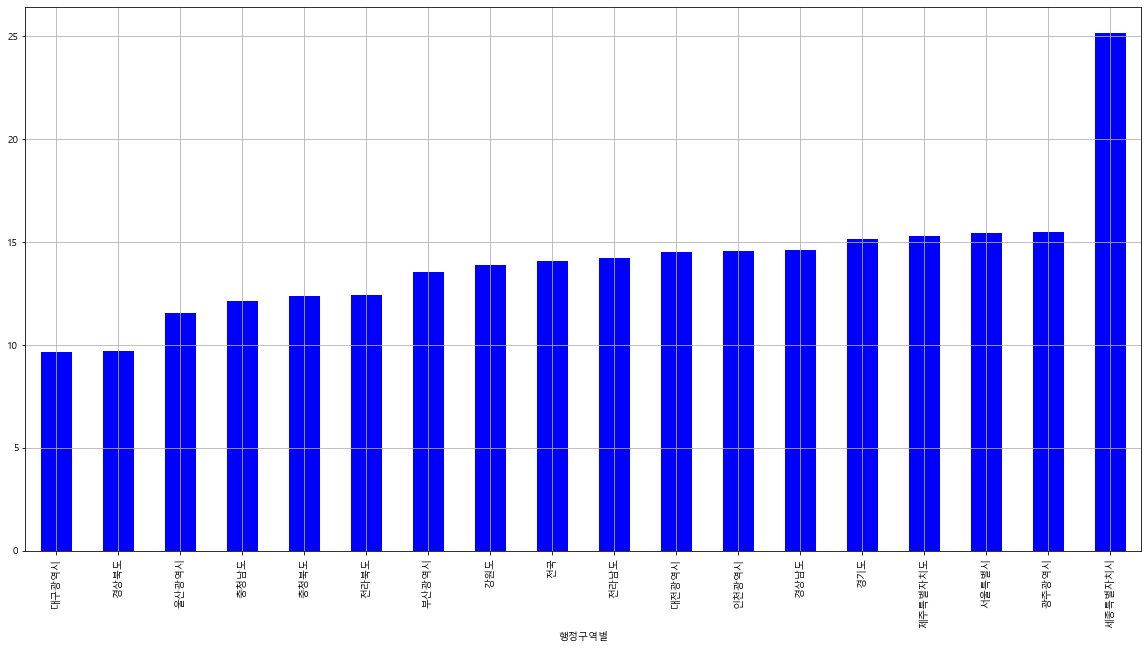

In [79]:
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족'].sort_values().plot(kind='bar',color='blue')
plt.grid(True)

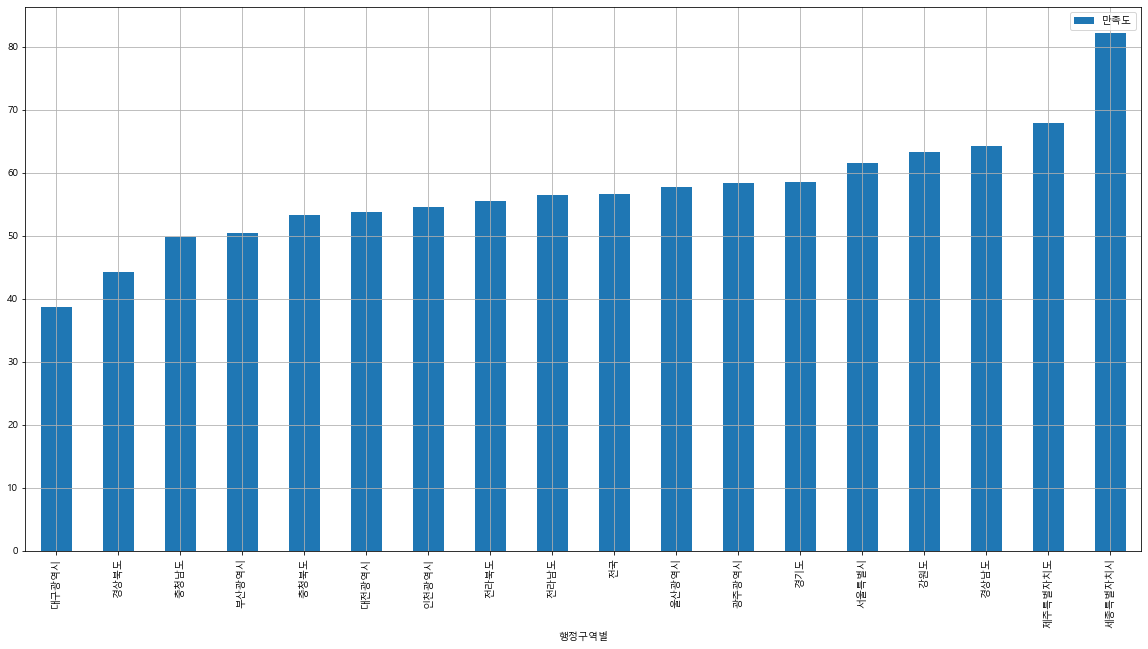

In [80]:
지역만족도=2*생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족']+생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족']-생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족']-2*생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 불만족']
지역만족도=지역만족도.to_frame()
지역만족도.columns=['만족도']
지역만족도.sort_values(by='만족도').plot(kind='bar')
plt.grid(True)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


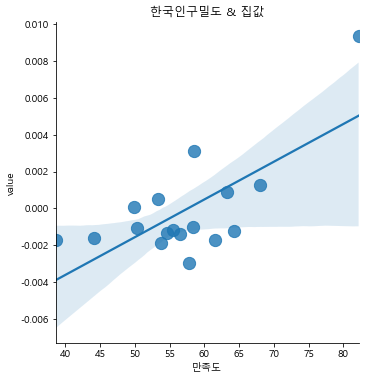

In [81]:
data = pd.concat([인구변동,지역만족도],axis=1)
g=sns.lmplot('만족도','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

<AxesSubplot:xlabel='통계분류(2)'>

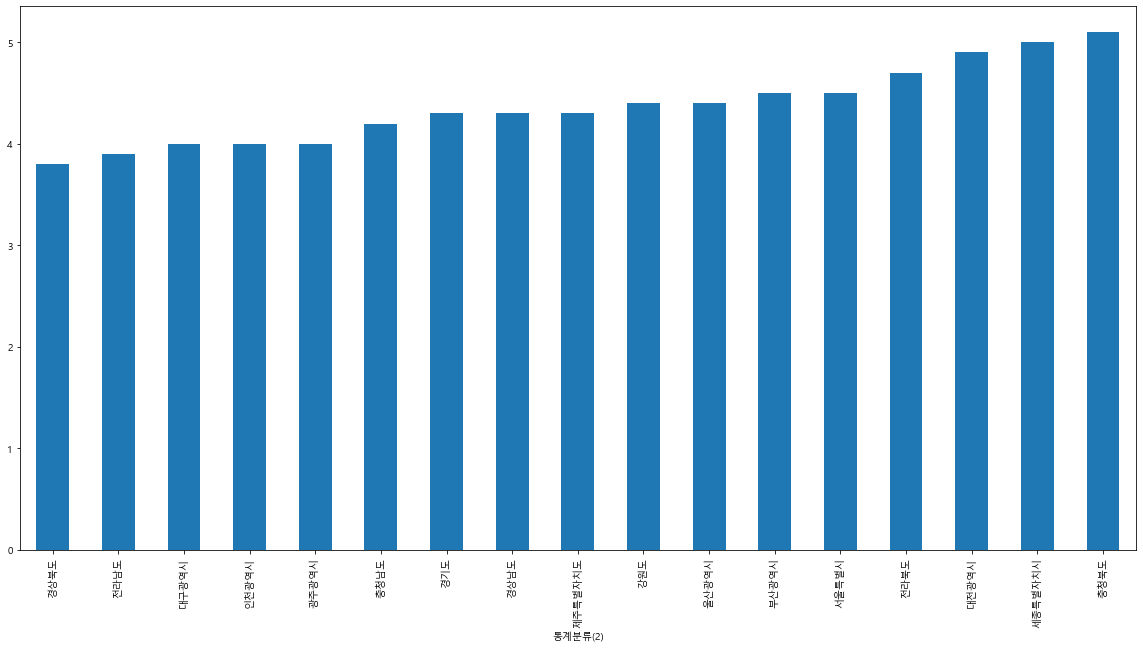

In [82]:
여가시설=여가시설.loc[여가시설['통계분류(1)']=='17개 시도별']
여가시설.평균.sort_values().plot(kind='bar')

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


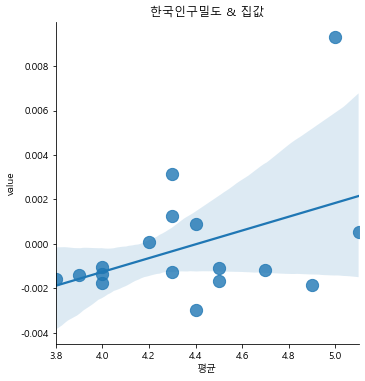

In [83]:
data = pd.concat([인구변동,여가시설],axis=1)
g=sns.lmplot('평균','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

<AxesSubplot:xlabel='행정구역(시군구)별'>

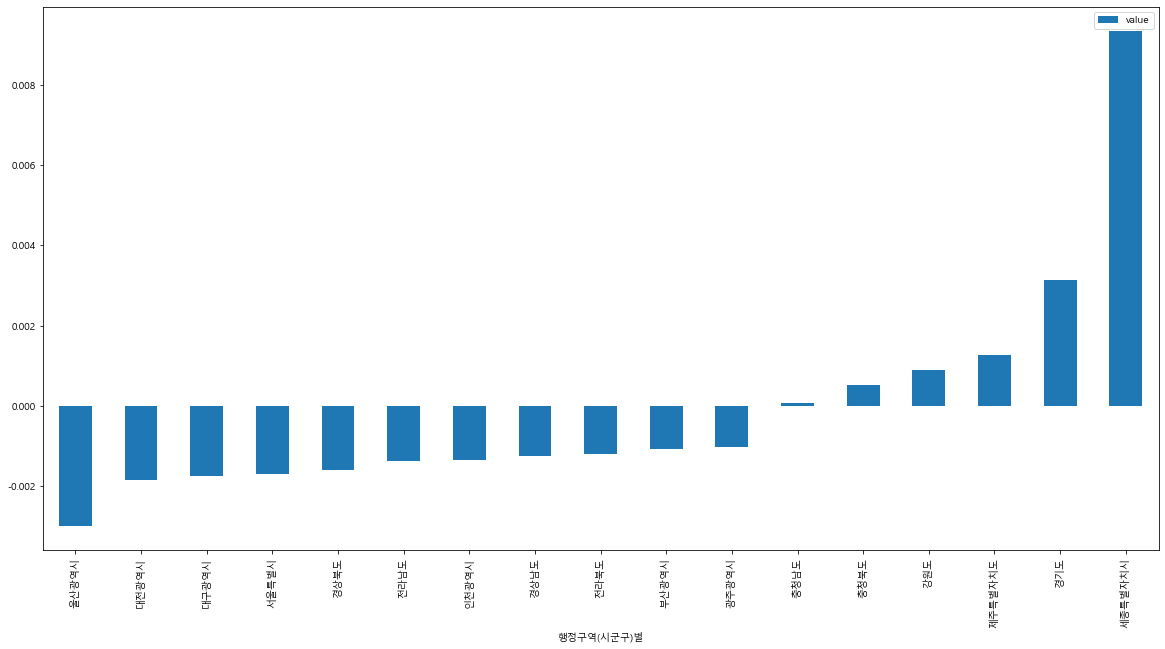

In [84]:
인구변동.sort_values(by='value').plot(kind='bar')

<AxesSubplot:xlabel='통계분류(2)'>

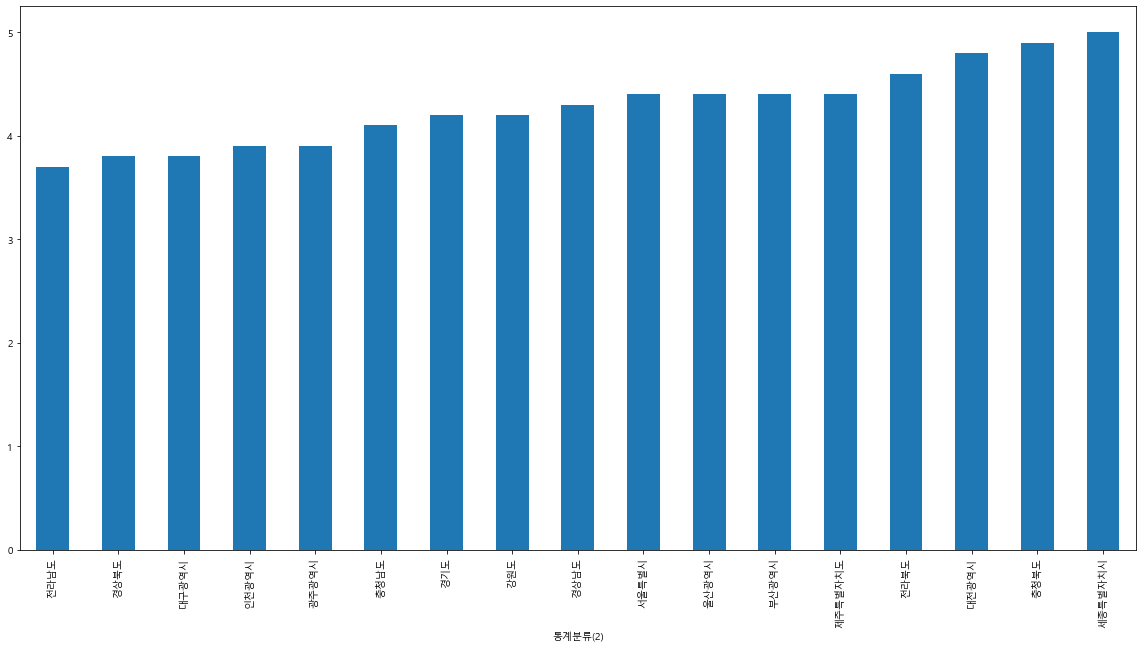

In [85]:
여가프로그램=여가프로그램.loc[여가프로그램['통계분류(1)']=='17개 시도별']
여가프로그램.평균1.sort_values().plot(kind='bar')

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


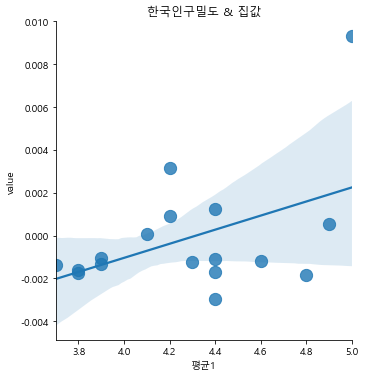

In [86]:
data = pd.concat([인구변동,여가프로그램],axis=1)
g=sns.lmplot('평균1','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

C:\Users\KimSungYong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


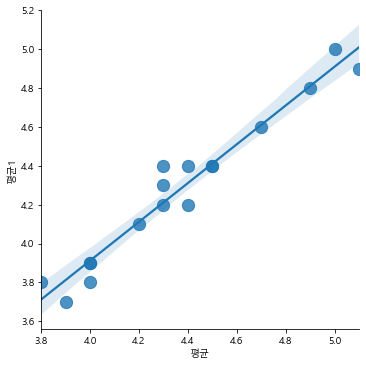

In [87]:
data = pd.concat([여가시설,여가프로그램],axis=1)
g=sns.lmplot('평균','평균1',data=data,fit_reg=True,scatter_kws={"s":150})
plt.show(g)

In [88]:
취업자

,기업규모별(이동전)(1),기업규모별(이동전)(2),2019
졸업지역별(1),,,
전체,전체,소계,57439
전체,영리기업,소계,39832
전체,영리기업,대기업,9163
전체,영리기업,중소기업,30669
전체,비영리기업,소계,17607
수도권,전체,소계,22741
수도권,영리기업,소계,16586
수도권,영리기업,대기업,4479
수도권,영리기업,중소기업,12107


In [89]:
대학생['합계']=대학생.sum(axis=1)
대학생

,대학교 재학생수,일반대,전문대,교육대,산업대,합계
행정구역별,,,,,,
전국,2633787,1981003,621772,15628,15384,5267574
서울특별시,563889,507319,54964,1606,0,1127778
부산광역시,230984,186383,43033,1568,0,461968
대구광역시,114809,61667,51484,1658,0,229618
인천광역시,67160,43435,22412,1313,0,134320
광주광역시,108225,82338,24498,1389,0,216450
대전광역시,134526,108791,25735,0,0,269052
울산광역시,32080,20509,11571,0,0,64160
세종특별자치시,22558,17852,4706,0,0,45116


In [90]:
대학['합계']=대학.sum(axis=1)
대학

,대학교 수,일반대,전문대,교육대,산업대,합계
행정구역별,,,,,,
전국,339,191,136,10,2,678
서울특별시,48,38,9,1,0,96
부산광역시,22,12,9,1,0,44
대구광역시,11,3,7,1,0,22
인천광역시,7,3,3,1,0,14
광주광역시,17,10,6,1,0,34
대전광역시,15,11,4,0,0,30
울산광역시,4,2,2,0,0,8
세종특별자치시,3,2,1,0,0,6


In [91]:
수도권대학생=대학생.loc[['서울특별시','인천광역시','경기도'],'합계'].sum()

In [92]:
수도권대학생

2128650

In [93]:
비수도권대학생=대학생.loc[['전국'],'합계']-수도권대학생

In [94]:
비수도권대학생=비수도권대학생.sum()
비수도권대학생

3138924

In [95]:
취업자

,기업규모별(이동전)(1),기업규모별(이동전)(2),2019
졸업지역별(1),,,
전체,전체,소계,57439
전체,영리기업,소계,39832
전체,영리기업,대기업,9163
전체,영리기업,중소기업,30669
전체,비영리기업,소계,17607
수도권,전체,소계,22741
수도권,영리기업,소계,16586
수도권,영리기업,대기업,4479
수도권,영리기업,중소기업,12107


In [96]:
취업자.loc[['수도권'],'2019']=취업자.loc[['수도권'],'2019']/수도권대학생
취업자.loc[['비수도권'],'2019']=취업자.loc[['비수도권'],'2019']/비수도권대학생

In [97]:
취업자

,기업규모별(이동전)(1),기업규모별(이동전)(2),2019
졸업지역별(1),,,
전체,전체,소계,57439.000000
전체,영리기업,소계,39832.000000
전체,영리기업,대기업,9163.000000
전체,영리기업,중소기업,30669.000000
전체,비영리기업,소계,17607.000000
수도권,전체,소계,0.010683
수도권,영리기업,소계,0.007792
수도권,영리기업,대기업,0.002104
수도권,영리기업,중소기업,0.005688


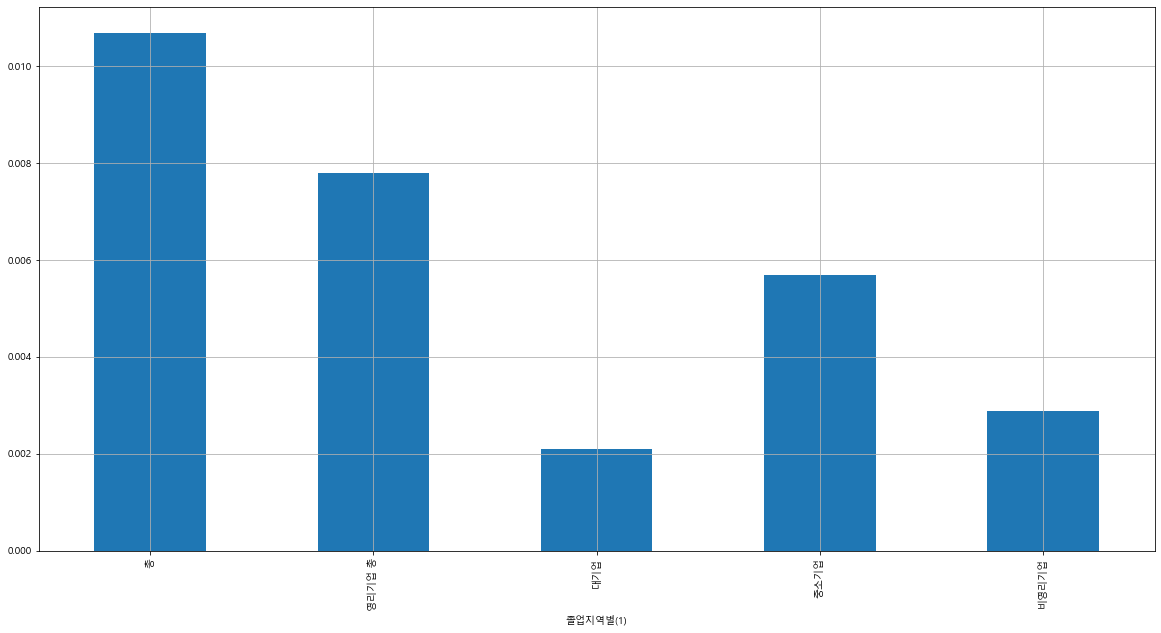

In [98]:
취업자.loc[['수도권'],'2019'].plot(kind='bar')
plt.xticks([0,1,2,3,4], ['총','영리기업 총','대기업','중소기업','비영리기업'])
plt.grid(True)

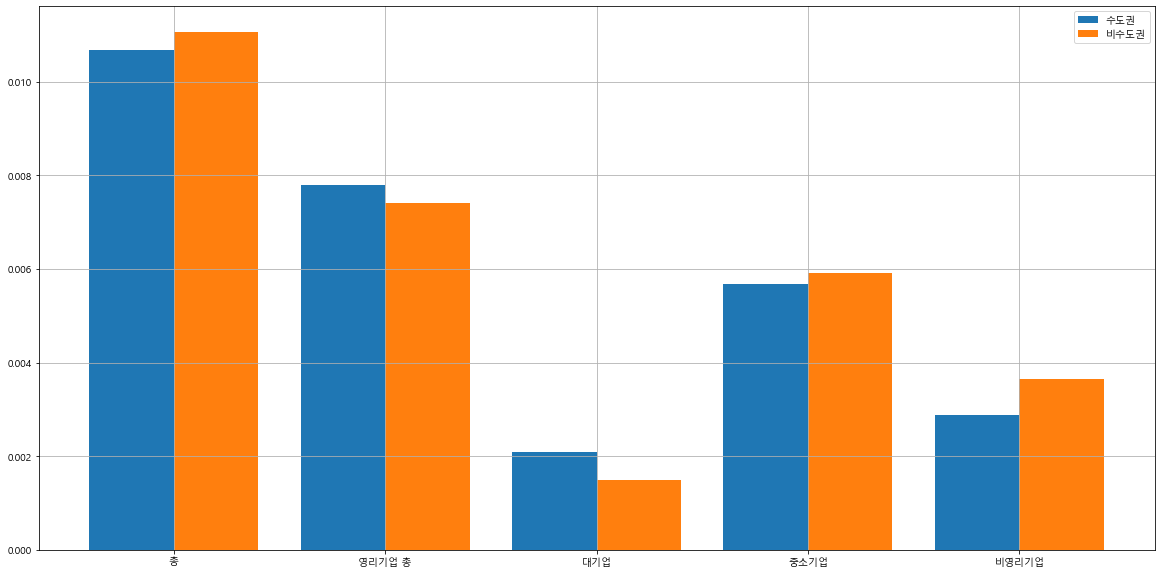

In [99]:
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element in range(d)]
plt.bar(store2_x, 취업자.loc[['수도권'],'2019'])

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + w*n for element in range(d)]
plt.bar(store1_x, 취업자.loc[['비수도권'],'2019'])



plt.xticks([1.2,3.2,5.2,7.2,9.2], ['총','영리기업 총','대기업','중소기업','비영리기업'])

plt.legend(['수도권','비수도권'])
plt.grid(True)

In [100]:
산업체

,행정구역별,산업별,종사자규모별,항목,단위,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
0,전국,전체 산업,계,사업체수,개,3355459,3470023,3602461,3676859,3812800,3874156,3950169,4019872,4103172,4176549
1,전국,전체 산업,계,종사자수,명,17646973,18093127,18569256,19173387,19899697,20889239,21259126,21626904,22234776,22723272
2,전국,전체 산업,1 - 4명,사업체수,개,2804612,2879668,2963367,3005238,3099808,3125589,3173185,3228202,3274152,3322812
3,전국,전체 산업,1 - 4명,종사자수,명,5075161,5211805,5298493,5377943,5586586,5602005,5705519,5847700,5878444,6041327
4,전국,전체 산업,5 - 9명,사업체수,개,283153,316658,366257,384596,414513,434111,454806,466829,491200,511446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,제주특별자치도,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",300 - 499명,종사자수,명,0,0,0,0,0,0,0,0,0,0
7196,제주특별자치도,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",500 - 999명,사업체수,개,0,0,0,0,0,0,1,0,0,0
7197,제주특별자치도,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",500 - 999명,종사자수,명,0,0,0,0,0,0,0,0,0,0
7198,제주특별자치도,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",1000명 이상,사업체수,개,0,0,0,0,0,0,0,0,0,0
